In [1]:
# !rm -r "/content/output_folder"

# SMAI Assignment - 2

## Question - `2` : Face Recognition using Principal Component Analysis

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

### <b>Objective:</b>
This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) 
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

### <b>About the dataset:</b>  
The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)



### Tasks
1. Load dataset and divide the date into training and test sets. 
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.


# ***TODO***

***1. upload ATnT.zip***</br>
***2. cv2_imshow(frame) to cv2.imshow()***</br>
***google colab doesn't support cv2.imshow***

#### Import Libraries

In [2]:
import pandas as pd
import os
import cv2
import numpy as np

In [3]:
!unzip "/content/ATnT.zip" -d "/content"

Archive:  /content/ATnT.zip
   creating: /content/ATnT/
  inflating: /content/ATnT/README    
   creating: /content/ATnT/s1/
  inflating: /content/ATnT/s1/1.pgm  
  inflating: /content/ATnT/s1/10.pgm  
  inflating: /content/ATnT/s1/2.pgm  
  inflating: /content/ATnT/s1/3.pgm  
  inflating: /content/ATnT/s1/4.pgm  
  inflating: /content/ATnT/s1/5.pgm  
  inflating: /content/ATnT/s1/6.pgm  
  inflating: /content/ATnT/s1/7.pgm  
  inflating: /content/ATnT/s1/8.pgm  
  inflating: /content/ATnT/s1/9.pgm  
   creating: /content/ATnT/s10/
  inflating: /content/ATnT/s10/1.pgm  
  inflating: /content/ATnT/s10/10.pgm  
  inflating: /content/ATnT/s10/2.pgm  
  inflating: /content/ATnT/s10/3.pgm  
  inflating: /content/ATnT/s10/4.pgm  
  inflating: /content/ATnT/s10/5.pgm  
  inflating: /content/ATnT/s10/6.pgm  
  inflating: /content/ATnT/s10/7.pgm  
  inflating: /content/ATnT/s10/8.pgm  
  inflating: /content/ATnT/s10/9.pgm  
   creating: /content/ATnT/s11/
  inflating: /content/ATnT/s11/1.pgm  


#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

./ATnT/README
None
./ATnT/s35/3.pgm
[[ 89  95  95 ... 152 144 134]
 [ 87  97  88 ... 155 145 140]
 [ 92  98  91 ... 144 151 142]
 ...
 [ 76  74  79 ... 143 139 148]
 [ 76  75  78 ... 137 146 151]
 [ 77  76  74 ... 147 152 159]]
(112, 92)


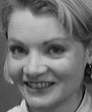

./ATnT/s35/4.pgm
[[ 84  96 101 ...  91  84  86]
 [ 94  93  93 ...  95  90  83]
 [ 94  96  87 ...  97  95  91]
 ...
 [193 196 202 ...  59  64  69]
 [190 195 199 ...  40  69  58]
 [191 191 197 ...  36  57  55]]
(112, 92)


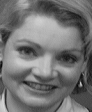

./ATnT/s35/9.pgm
[[ 67  62  88 ... 158 141 151]
 [ 66  57  75 ... 156 149 140]
 [ 65  71  74 ... 150 155 142]
 ...
 [ 51  47  50 ... 176 166 147]
 [ 52  50  50 ... 170 161 140]
 [ 48  53  55 ... 167 157 145]]
(112, 92)


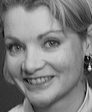

./ATnT/s35/2.pgm
[[ 86  89  90 ... 143 129 125]
 [ 83  90  89 ... 138 140 135]
 [ 89  89  88 ... 136 128 131]
 ...
 [201 206 209 ...  79  75  76]
 [201 206 207 ... 112  85  66]
 [201 205 208 ... 124 116  83]]
(112, 92)


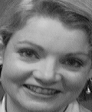

./ATnT/s35/5.pgm
[[ 91  83  70 ... 162 161 157]
 [ 82  81  72 ... 148 165 162]
 [ 86  74  70 ... 138 164 168]
 ...
 [ 54  50  52 ... 156 181 193]
 [ 52  51  51 ... 165 186 195]
 [ 48  56  45 ... 171 188 190]]
(112, 92)


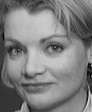

./ATnT/s35/7.pgm
[[ 88  97  95 ... 104  87  80]
 [ 94  95  96 ... 109 105  84]
 [ 93 101 101 ... 109 105 104]
 ...
 [224 208 115 ...  71  64  62]
 [222 215 180 ...  80  73  77]
 [200 216 204 ...  67  68  69]]
(112, 92)


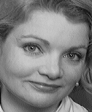

./ATnT/s35/1.pgm
[[ 86  90  87 ...  84  85  87]
 [ 93  86  87 ...  88  84  88]
 [ 89  86  88 ...  88  84  87]
 ...
 [ 97 103 126 ... 109  94  81]
 [177 182 191 ... 135 127 133]
 [203 203 203 ... 153 142 139]]
(112, 92)


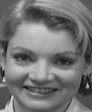

./ATnT/s35/6.pgm
[[ 95  89  89 ... 103 112  91]
 [ 95  95  93 ...  89 107 111]
 [ 91  95  94 ...  80  99 100]
 ...
 [173 209 208 ...  57  54  54]
 [180 209 209 ...  54  58  54]
 [184 207 208 ...  43  55  55]]
(112, 92)


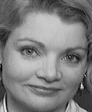

./ATnT/s35/10.pgm
[[ 92  86  89 ... 159 144 137]
 [ 88  89  92 ... 144 157 143]
 [ 88  89  91 ... 140 145 156]
 ...
 [ 52  50  50 ... 184 187 182]
 [ 52  52  53 ... 186 181 175]
 [ 52  49  54 ... 183 175 175]]
(112, 92)


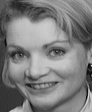

./ATnT/s35/8.pgm
[[ 92  93  96 ...  92  89  90]
 [ 94  96  91 ...  93  95  92]
 [ 91  90  89 ...  94  90  96]
 ...
 [148 197 171 ... 121 112  54]
 [154 198 165 ... 174 162 156]
 [159 195 161 ... 192 163 157]]
(112, 92)


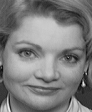

./ATnT/s15/3.pgm
[[ 39  40  38 ...  34  41  31]
 [ 36  39  39 ...  33  39  33]
 [ 39  40  36 ...  38  38  34]
 ...
 [184 187 194 ...  39  37  39]
 [183 186 197 ...  35  39  37]
 [191 194 207 ...  36  38  40]]
(112, 92)


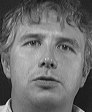

./ATnT/s15/4.pgm
[[ 39  41  37 ...  36  37  37]
 [ 38  36  40 ...  41  35  40]
 [ 37  43  35 ...  35  37  36]
 ...
 [209 210 211 ...  30  34  39]
 [209 213 204 ...  34  31  36]
 [209 213 195 ...  33  33  40]]
(112, 92)


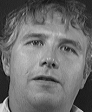

./ATnT/s15/9.pgm
[[120 119 121 ... 113 117 117]
 [121 122 121 ... 115 113 117]
 [121 119 122 ... 115 117 117]
 ...
 [116  90 132 ...  77  76  78]
 [101  92 153 ...  79  74  79]
 [ 95 105 175 ...  74  74  80]]
(112, 92)


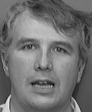

./ATnT/s15/2.pgm
[[121 120 120 ... 117 116 118]
 [120 120 120 ... 116 122 119]
 [119 119 121 ... 119 116 123]
 ...
 [199 179 184 ...  80  74  80]
 [179 119 119 ...  80  79  77]
 [181 136  95 ...  79  76  78]]
(112, 92)


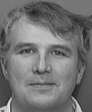

./ATnT/s15/5.pgm
[[117 122 120 ... 114 111 118]
 [117 120 121 ... 116 113 115]
 [122 123 121 ... 116 114 114]
 ...
 [207 190 193 ...  82  75  77]
 [171 190 202 ...  78  76  77]
 [157 200 203 ...  76  78  71]]
(112, 92)


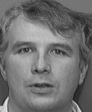

./ATnT/s15/7.pgm
[[119 123 123 ... 116 117 113]
 [117 123 123 ... 119 113 115]
 [121 125 120 ... 115 115 112]
 ...
 [193 202 211 ...  76  75  75]
 [206 206 209 ...  79  74  72]
 [203 205 211 ...  78  72  75]]
(112, 92)


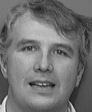

./ATnT/s15/1.pgm
[[ 38  35  40 ...  34  36  36]
 [ 37  41  37 ...  38  36  39]
 [ 37  40  39 ...  34  38  36]
 ...
 [192 197 198 ...  36  34  36]
 [184 193 204 ...  36  35  37]
 [190 202 208 ...  36  35  39]]
(112, 92)


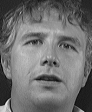

./ATnT/s15/6.pgm
[[ 38  41  37 ...  42  38  34]
 [ 42  39  39 ...  37  34  41]
 [ 39  43  40 ...  42  36  39]
 ...
 [197 197 200 ...  37  38  36]
 [188 186 199 ...  39  39  37]
 [182 182 195 ...  39  38  40]]
(112, 92)


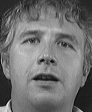

./ATnT/s15/10.pgm
[[119 121 123 ... 115 120 115]
 [124 119 122 ... 116 118 118]
 [122 119 122 ... 113 117 116]
 ...
 [203 205 210 ...  79  78  75]
 [200 204 212 ...  78  74  77]
 [199 205 210 ...  73  74  76]]
(112, 92)


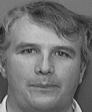

./ATnT/s15/8.pgm
[[ 45  38  40 ...  38  36  42]
 [ 44  41  40 ...  38  37  39]
 [ 45  35  41 ...  37  35  40]
 ...
 [201 180 199 ...  40  41  41]
 [185 188 210 ...  21  41  41]
 [184 210 194 ... 135  24  36]]
(112, 92)


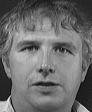

./ATnT/s30/3.pgm
[[110 108 109 ... 100  98 104]
 [110 110 110 ... 102  99 102]
 [110 108 108 ... 102 100 102]
 ...
 [212 193 150 ...  65  66  64]
 [199 215 163 ...  66  63  67]
 [200 206 206 ...  66  64  63]]
(112, 92)


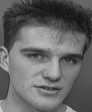

./ATnT/s30/4.pgm
[[110 113 108 ... 105 100 105]
 [108 113 107 ... 105 102 106]
 [109 111 112 ... 103 102 104]
 ...
 [202 201 204 ...  65  65  67]
 [204 202 203 ...  66  61  66]
 [204 203 204 ...  63  63  61]]
(112, 92)


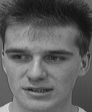

./ATnT/s30/9.pgm
[[108 108 106 ... 103 106 105]
 [110 104 110 ... 104 102 109]
 [108 106 109 ... 103 105 104]
 ...
 [ 77  79  74 ...  73  71  69]
 [ 75  90 128 ...  70  71  70]
 [132 176 193 ...  69  69  70]]
(112, 92)


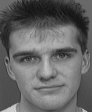

./ATnT/s30/2.pgm
[[110 111 110 ... 103 102 100]
 [110 110 112 ... 101 104 100]
 [111 109 111 ... 100 102 104]
 ...
 [198 201 203 ...  62  65  62]
 [201 201 203 ...  64  60  62]
 [202 203 203 ...  63  59  60]]
(112, 92)


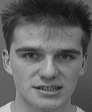

./ATnT/s30/5.pgm
[[112 109 112 ... 103 103 101]
 [111 112 111 ... 102 101 101]
 [112 111 113 ... 103 102 105]
 ...
 [204 207 204 ...  64  61  62]
 [205 205 205 ...  63  62  62]
 [203 204 209 ...  61  62  62]]
(112, 92)


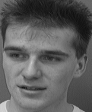

./ATnT/s30/7.pgm
[[110 110 112 ... 104 105 102]
 [109 110 113 ... 103 104 104]
 [108 113 107 ... 105 105 103]
 ...
 [194 200 198 ...  68  66  64]
 [203 202 199 ...  65  65  65]
 [203 201 198 ... 141  88  64]]
(112, 92)


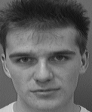

./ATnT/s30/1.pgm
[[111 107 109 ... 102 104 101]
 [107 109 106 ... 103 100 105]
 [106 108 107 ... 103 104  99]
 ...
 [205 203 203 ...  68  68  68]
 [207 201 205 ...  67  65  67]
 [209 203 203 ...  65  68  65]]
(112, 92)


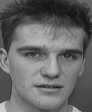

./ATnT/s30/6.pgm
[[106 106 110 ... 104 105 103]
 [107 106 108 ... 102 104 102]
 [107 107 107 ... 101 104 103]
 ...
 [132 177 200 ...  69  69  69]
 [185 198 203 ...  69  68  68]
 [188 199 204 ...  69  69  68]]
(112, 92)


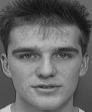

./ATnT/s30/10.pgm
[[109 107 108 ... 107 101 101]
 [109 106 110 ... 102 104 100]
 [108 109 108 ... 101 103  98]
 ...
 [199 203 217 ...  68  67  65]
 [203 198 216 ...  65  69  70]
 [204 200 201 ...  66  67  67]]
(112, 92)


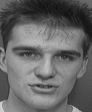

./ATnT/s30/8.pgm
[[112 110 113 ... 102 103 103]
 [110 113 109 ... 103 101 107]
 [110 111 111 ... 104 104 104]
 ...
 [203 199 200 ... 106  67  62]
 [203 198 203 ... 159 150 103]
 [202 199 202 ... 157 159 167]]
(112, 92)


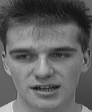

./ATnT/s22/3.pgm
[[ 50  54  61 ...  50  50  54]
 [ 58  56  60 ...  53  57  48]
 [ 54  56  56 ...  53  57  54]
 ...
 [129 103 119 ...  58  73  83]
 [116 207 196 ... 116  77  91]
 [102 230 209 ... 152 165  67]]
(112, 92)


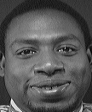

./ATnT/s22/4.pgm
[[ 58  54  57 ...  53  50  54]
 [ 57  50  57 ...  51  54  47]
 [ 59  52  60 ...  52  53  53]
 ...
 [ 76  97 104 ... 119 113 106]
 [160 191 205 ... 119 137 142]
 [136 136 149 ...  97 115 128]]
(112, 92)


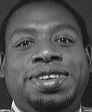

./ATnT/s22/9.pgm
[[ 55  56  56 ...  55  54  50]
 [ 56  51  60 ...  55  47  55]
 [ 57  54  57 ...  51  54  52]
 ...
 [183 201 201 ... 152 149 169]
 [112 148 136 ... 107 170 192]
 [125 144 128 ...  69 144 193]]
(112, 92)


./ATnT/s22/2.pgm
[[ 54  55  60 ...  57  50  56]
 [ 54  57  59 ...  51  52  55]
 [ 58  60  57 ...  54  55  57]
 ...
 [128 169 153 ... 113  71  78]
 [ 99 223 209 ... 143 154 124]
 [106 227 217 ... 156 181 217]]
(112, 92)


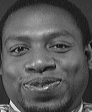

./ATnT/s22/5.pgm
[[ 49  65  53 ...  54  50  56]
 [ 62  55  59 ...  51  52  54]
 [ 57  63  51 ...  54  51  56]
 ...
 [146 134 158 ...  82  72  78]
 [125 159 151 ... 142  84  65]
 [104 221 209 ... 134 130 145]]
(112, 92)


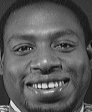

./ATnT/s22/7.pgm
[[ 56  58  50 ...  55  48  54]
 [ 56  49  59 ...  51  53  47]
 [ 52  55  57 ...  54  47  55]
 ...
 [126 136 140 ...  73 139 200]
 [128 134 112 ...  86  86 202]
 [155 122 110 ...  63  75 189]]
(112, 92)


./ATnT/s22/1.pgm
[[ 58  55  52 ...  48  55  46]
 [ 51  59  55 ...  45  49  56]
 [ 55  52  57 ...  51  53  52]
 ...
 [201 202 209 ...  78  82  80]
 [124 106 120 ...  74  67  80]
 [111 203 195 ... 131 115  68]]
(112, 92)


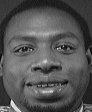

./ATnT/s22/6.pgm
[[ 54  53  53 ...  46  56  50]
 [ 54  49  57 ...  54  45  52]
 [ 52  55  54 ...  59  44  55]
 ...
 [157 179 159 ... 101 110 147]
 [208 211 210 ... 116 116  93]
 [213 212 209 ... 227 104 125]]
(112, 92)


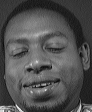

./ATnT/s22/10.pgm
[[ 58  57  61 ...  53  56  53]
 [ 57  59  62 ...  56  45  59]
 [ 60  58  60 ...  51  54  56]
 ...
 [142  83 219 ... 211 115 130]
 [148  76 228 ... 212 107 116]
 [138  99 226 ... 204 102  98]]
(112, 92)


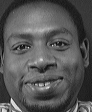

./ATnT/s22/8.pgm
[[ 53  58  53 ...  48  53  53]
 [ 54  55  64 ...  50  50  49]
 [ 56  57  56 ...  52  48  54]
 ...
 [123 132 109 ... 199 140 101]
 [122 146  71 ... 202 140  81]
 [105 148  77 ... 195 122  76]]
(112, 92)


./ATnT/s20/3.pgm
[[111 110 114 ... 114 110 114]
 [113 108 109 ... 109 114 110]
 [112 112 112 ... 113 112 112]
 ...
 [100  97  98 ...  52  54  52]
 [ 94  98  97 ...  47  58  47]
 [101  90 104 ...  57  53  48]]
(112, 92)


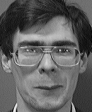

./ATnT/s20/4.pgm
[[116 116 117 ... 114 117 114]
 [115 118 117 ... 113 120 115]
 [111 121 111 ... 113 116 116]
 ...
 [101  96 101 ...  21  25  24]
 [103  93 100 ...  17  27  19]
 [ 98  96  98 ...  19  24  16]]
(112, 92)


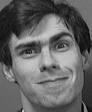

./ATnT/s20/9.pgm
[[109 107 110 ... 106 108 105]
 [108 110 108 ... 106 107 108]
 [109 109 108 ... 106 108 108]
 ...
 [ 38  51  43 ...  37  42  35]
 [ 47  49  33 ...  38  40  31]
 [ 47  40  44 ...  42  40  35]]
(112, 92)


./ATnT/s20/2.pgm
[[113 111 112 ... 112 110 109]
 [113 112 111 ... 111 112 110]
 [108 112 110 ... 111 108 111]
 ...
 [ 99 100  97 ...  49  54  47]
 [ 98 101  96 ...  48  53  53]
 [ 97  96  95 ...  47  57  55]]
(112, 92)


./ATnT/s20/5.pgm
[[108 110 108 ... 107 105 105]
 [110 110 110 ... 108 104 106]
 [111 107 111 ... 107 108 107]
 ...
 [ 40  40  44 ...  40  36  32]
 [ 44  48  52 ...  26  37  36]
 [ 41  47  54 ...  36  35  34]]
(112, 92)


./ATnT/s20/7.pgm
[[108 110 111 ... 105 106 107]
 [108 110 109 ... 108 105 106]
 [109 108 109 ... 107 104 106]
 ...
 [ 46  41  46 ...  30  35  32]
 [ 46  42  50 ...  38  38  35]
 [ 55  49  43 ...  26  37  37]]
(112, 92)


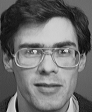

./ATnT/s20/1.pgm
[[109 110 113 ... 108 112 107]
 [111 112 112 ... 108 108 107]
 [112 111 112 ... 108 108 108]
 ...
 [ 94 101 101 ...  57  51  53]
 [ 99  97 102 ...  49  51  57]
 [ 97  95 101 ...  49  52  51]]
(112, 92)


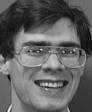

./ATnT/s20/6.pgm
[[115 118 117 ... 117 114 116]
 [114 116 117 ... 113 119 113]
 [118 114 117 ... 115 116 112]
 ...
 [ 98 102 100 ...  25  23  25]
 [ 99  98  98 ...  21  26  21]
 [101 100  95 ...  22  25  28]]
(112, 92)


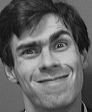

./ATnT/s20/10.pgm
[[109 111 111 ... 111 114 113]
 [112 114 113 ... 111 114 114]
 [106 113 113 ... 112 113 114]
 ...
 [ 98  96  99 ...  52  50  53]
 [101 100  87 ...  51  48  56]
 [ 89  81  62 ...  51  50  51]]
(112, 92)


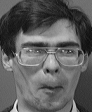

./ATnT/s20/8.pgm
[[102 103 103 ... 103 100 101]
 [102 103 103 ... 101  97 101]
 [104 102 102 ... 101 102 101]
 ...
 [ 43  41  42 ...  37  36  27]
 [ 36  41  48 ...  37  43  35]
 [ 42  40  31 ...  36  37  31]]
(112, 92)


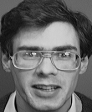

./ATnT/s28/3.pgm
[[124 123 126 ... 115 113 116]
 [123 125 123 ... 113 114 114]
 [123 125 121 ... 112 113 113]
 ...
 [114 131 117 ...  78  77  74]
 [119 105 127 ...  76  76  73]
 [143  98 132 ...  75  72  78]]
(112, 92)


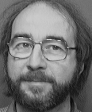

./ATnT/s28/4.pgm
[[ 49  50  48 ...  44  47  43]
 [ 50  50  55 ...  48  45  44]
 [ 52  62  56 ...  47  47  48]
 ...
 [115 115 108 ...  58  70  68]
 [117 121 120 ...  66  70  73]
 [125 119 122 ...  73  77  71]]
(112, 92)


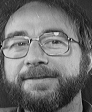

./ATnT/s28/9.pgm
[[ 48  50  51 ...  50  50  52]
 [ 49  54  50 ...  50  48  49]
 [ 60  50  52 ...  52  48  47]
 ...
 [ 81  47 135 ...  92  93 103]
 [ 58  84 147 ...  90  90 105]
 [ 62 135 144 ...  87  90  99]]
(112, 92)


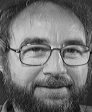

./ATnT/s28/2.pgm
[[ 52  52  46 ...  41  49  45]
 [ 48  54  50 ...  48  47  43]
 [ 49  54  51 ...  45  50  52]
 ...
 [142  98  87 ...  84  65  45]
 [137 105  84 ...  84  74  44]
 [138 116  90 ...  88  82  52]]
(112, 92)


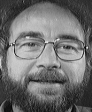

./ATnT/s28/5.pgm
[[ 48  48  55 ...  44  46  47]
 [ 51  47  54 ...  48  47  47]
 [ 49  56  50 ...  48  46  48]
 ...
 [107  96  59 ...  94  94 108]
 [110  89  59 ...  90  98 104]
 [110  79 116 ...  88  93  99]]
(112, 92)


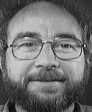

./ATnT/s28/7.pgm
[[ 63  56  51 ...  43  44  44]
 [ 54  56  49 ...  44  49  50]
 [ 50  54  47 ...  47  47  44]
 ...
 [106 124 120 ... 110 126  88]
 [ 96 120 125 ... 111 137  97]
 [ 86 117 124 ... 118 127 137]]
(112, 92)


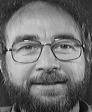

./ATnT/s28/1.pgm
[[122 122 121 ... 117 111 113]
 [125 122 124 ... 113 112 114]
 [124 122 119 ... 116 111 114]
 ...
 [107 114 129 ...  78  83  79]
 [125  93 132 ...  81  80  80]
 [125 106 112 ...  77  77  79]]
(112, 92)


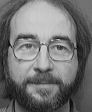

./ATnT/s28/6.pgm
[[124 121 123 ... 111 109 112]
 [126 119 125 ... 112 109 113]
 [122 122 124 ... 112 109 113]
 ...
 [119  97 130 ...  80  80  76]
 [142  95 130 ...  78  77  77]
 [132 129 132 ...  78  76  74]]
(112, 92)


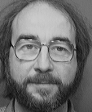

./ATnT/s28/10.pgm
[[124 121 125 ... 113 114 114]
 [124 120 126 ... 112 113 115]
 [126 124 121 ... 115 114 112]
 ...
 [ 77  89  84 ...  57  57  63]
 [101 104 103 ...  57  58  57]
 [135  85 113 ...  57  56  59]]
(112, 92)


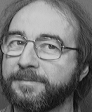

./ATnT/s28/8.pgm
[[122 125 123 ... 116 113 113]
 [123 124 123 ... 112 115 116]
 [124 124 124 ... 112 115 113]
 ...
 [ 73  73  69 ...  78  76  76]
 [ 72  74  78 ...  76  73  78]
 [ 86  96 116 ...  75  74  74]]
(112, 92)


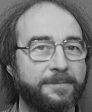

./ATnT/s40/3.pgm
[[131 125 126 ... 125 127 124]
 [131 128 124 ... 125 125 125]
 [127 127 125 ... 122 125 127]
 ...
 [ 99 100  99 ...  90  93  91]
 [101  97  99 ...  90  92  89]
 [ 98  94 103 ...  89  93  91]]
(112, 92)


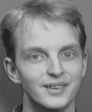

./ATnT/s40/4.pgm
[[130 123 127 ... 120 120 124]
 [126 130 123 ... 120 120 120]
 [123 125 127 ... 122 118 119]
 ...
 [ 88  91  96 ...  38  37  39]
 [ 91  90  96 ...  38  32  42]
 [ 91  94  88 ...  33  37  40]]
(112, 92)


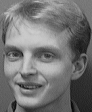

./ATnT/s40/9.pgm
[[119 120 120 ... 129 128 124]
 [118 121 120 ... 126 124 127]
 [120 119 118 ... 121 128 127]
 ...
 [ 64  61  64 ...  89  92  88]
 [ 64  63  58 ...  93  90  92]
 [ 65  61  63 ...  89  94  85]]
(112, 92)


./ATnT/s40/2.pgm
[[127 131 128 ... 123 127 122]
 [132 126 127 ... 124 126 122]
 [128 127 122 ... 123 126 124]
 ...
 [ 95  89  86 ...  89  91  93]
 [ 99  91  84 ...  93  87  90]
 [ 96  94  88 ...  94  84  89]]
(112, 92)


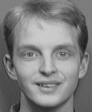

./ATnT/s40/5.pgm
[[128 125 125 ... 121 122 121]
 [129 127 128 ... 125 121 125]
 [126 126 131 ... 124 124 125]
 ...
 [ 71  65  90 ...  90  86  90]
 [ 72  75  99 ...  86  88  91]
 [ 63  87 100 ...  85  90  84]]
(112, 92)


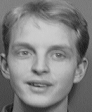

./ATnT/s40/7.pgm
[[129 127 133 ... 122 124 124]
 [130 128 126 ... 123 124 122]
 [127 126 132 ... 123 123 126]
 ...
 [ 69  72  71 ...  90  90  95]
 [ 70  69  71 ...  92  93  92]
 [ 74  69  72 ...  93  93  93]]
(112, 92)


./ATnT/s40/1.pgm
[[119 121 123 ... 122 118 119]
 [122 123 123 ... 122 120 120]
 [120 125 121 ... 123 121 120]
 ...
 [ 85  88  88 ...  38  36  43]
 [ 84  84  87 ...  37  34  45]
 [ 80  89  85 ...  36  40  36]]
(112, 92)


./ATnT/s40/6.pgm
[[123 121 126 ... 120 117 120]
 [128 123 125 ... 120 119 121]
 [126 124 123 ... 118 122 121]
 ...
 [ 84  95  90 ...  38  37  44]
 [ 94  88  91 ...  35  45  39]
 [ 89  94  89 ...  40  35  42]]
(112, 92)


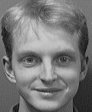

./ATnT/s40/10.pgm
[[125 124 124 ... 122 111 115]
 [124 125 126 ... 118 116 115]
 [121 128 121 ... 123 111 118]
 ...
 [ 93  91  89 ...  32  31  35]
 [ 92  93  93 ...  32  35  32]
 [ 92  89  93 ...  36  35  34]]
(112, 92)


./ATnT/s40/8.pgm
[[125 119 124 ... 122 120 116]
 [121 124 118 ... 119 120 120]
 [122 125 122 ... 121 118 121]
 ...
 [ 85  93  82 ...  48  35  43]
 [ 87  92  85 ...  40  39  35]
 [ 79  93  89 ...  36  39  40]]
(112, 92)


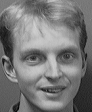

./ATnT/s25/3.pgm
[[120 123 119 ... 114 113 115]
 [122 122 121 ... 117 114 114]
 [121 121 120 ... 114 115 114]
 ...
 [121 131 138 ...  98  96 101]
 [119 131 138 ...  96  94 102]
 [115 130 132 ...  96  95 103]]
(112, 92)


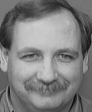

./ATnT/s25/4.pgm
[[124 124 123 ... 115 114 117]
 [124 124 122 ... 118 116 114]
 [124 121 124 ... 116 118 112]
 ...
 [130 111 143 ...  97 101  86]
 [128 118 145 ...  99  85 101]
 [128 129 145 ...  99 102  95]]
(112, 92)


./ATnT/s25/9.pgm
[[122 124 121 ... 116 116 116]
 [118 123 122 ... 116 115 114]
 [121 125 124 ... 116 118 115]
 ...
 [ 68 113 131 ...  97  85  78]
 [ 69 106 132 ...  91  97  88]
 [ 64 100 126 ...  85  98  84]]
(112, 92)


./ATnT/s25/2.pgm
[[123 122 121 ... 117 116 115]
 [124 123 121 ... 115 116 117]
 [123 123 123 ... 116 116 116]
 ...
 [ 88 100 129 ...  94  85  79]
 [ 86  95 129 ...  84  92  95]
 [ 78  95 125 ...  84  92  94]]
(112, 92)


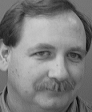

./ATnT/s25/5.pgm
[[123 124 122 ... 118 121 116]
 [124 122 122 ... 118 121 119]
 [125 124 122 ... 118 122 114]
 ...
 [144 106  69 ...  75  70 107]
 [143 100  67 ...  74  68 103]
 [140  96  67 ...  69  71 101]]
(112, 92)


./ATnT/s25/7.pgm
[[119 120 121 ... 114 114 115]
 [122 119 121 ... 115 113 116]
 [121 120 121 ... 113 116 112]
 ...
 [142  99 118 ... 100 101 100]
 [143  97 117 ... 101 101 104]
 [141  95 111 ...  99 100 104]]
(112, 92)


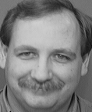

./ATnT/s25/1.pgm
[[118 119 122 ... 111 115 112]
 [119 120 121 ... 112 115 112]
 [122 120 123 ... 113 114 114]
 ...
 [129 135  92 ...  97  98 102]
 [132 137  91 ...  97 101 100]
 [128 139  95 ...  97 102 101]]
(112, 92)


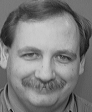

./ATnT/s25/6.pgm
[[122 123 122 ... 118 114 118]
 [124 122 122 ... 117 116 114]
 [122 123 122 ... 116 115 115]
 ...
 [132 110 131 ...  98  92  93]
 [128 116 137 ...  99  93  90]
 [126 121 146 ...  98 101  85]]
(112, 92)


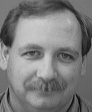

./ATnT/s25/10.pgm
[[120 122 118 ... 114 113 113]
 [119 119 120 ... 113 112 116]
 [117 120 120 ... 113 113 113]
 ...
 [120 103 124 ...  95  98 100]
 [122 100 124 ...  93  98  99]
 [126  94 123 ...  94  98  99]]
(112, 92)


./ATnT/s25/8.pgm
[[119 123 121 ... 115 117 116]
 [119 121 122 ... 118 114 119]
 [121 121 121 ... 115 114 115]
 ...
 [139  77  90 ...  94 106  91]
 [141  81  87 ...  95 107  91]
 [140  82  89 ...  93 106  90]]
(112, 92)


./ATnT/s23/3.pgm
[[120 119 118 ... 128 125 124]
 [119 115 119 ... 125 125 125]
 [117 120 119 ... 123 128 124]
 ...
 [110 101 106 ...  87  91  91]
 [107  98 105 ...  82  88  88]
 [119 104 111 ...  63  73  80]]
(112, 92)


./ATnT/s23/4.pgm
[[114 120 118 ... 123 124 124]
 [116 124 121 ... 122 128 127]
 [118 120 120 ... 128 126 124]
 ...
 [101 105  88 ...  93  91  87]
 [101 112 107 ...  87  92  87]
 [103 106 106 ...  79  92  87]]
(112, 92)


./ATnT/s23/9.pgm
[[124 126 124 ... 120 120 119]
 [124 122 126 ... 121 117 120]
 [125 125 123 ... 120 117 121]
 ...
 [ 74  74  68 ...  81  79  79]
 [ 74  71  69 ...  79  78  82]
 [ 72  72  68 ...  78  78  77]]
(112, 92)


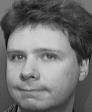

./ATnT/s23/2.pgm
[[122 121 121 ... 119 120 121]
 [122 124 124 ... 119 120 122]
 [122 123 122 ... 118 121 122]
 ...
 [ 73  75  75 ...  83  83  85]
 [ 74  72  75 ...  78  83  79]
 [ 74  73  72 ...  78  78  80]]
(112, 92)


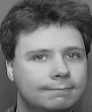

./ATnT/s23/5.pgm
[[116 119 117 ... 124 125 125]
 [122 118 120 ... 123 123 122]
 [118 120 118 ... 130 121 128]
 ...
 [104 101 104 ...  75  84  89]
 [119 102 118 ...  60  64  84]
 [ 94  84 107 ...  60  54  64]]
(112, 92)


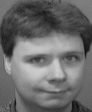

./ATnT/s23/7.pgm
[[118 122 118 ... 119 126 126]
 [122 118 117 ... 122 125 125]
 [119 121 116 ... 122 124 124]
 ...
 [ 90 101 104 ...  80  90  88]
 [ 93  83 110 ...  76  79  80]
 [103  68 103 ...  78  62  62]]
(112, 92)


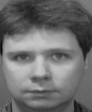

./ATnT/s23/1.pgm
[[122 124 121 ... 124 121 120]
 [124 122 124 ... 118 121 119]
 [122 123 125 ... 122 116 122]
 ...
 [ 75  74  75 ...  88  81  86]
 [ 75  71  74 ...  83  83  84]
 [ 72  74  74 ...  86  84  84]]
(112, 92)


./ATnT/s23/6.pgm
[[121 118 117 ... 127 124 127]
 [117 117 117 ... 126 123 125]
 [120 120 119 ... 122 125 124]
 ...
 [ 90  97  89 ...  90  90  90]
 [102 105  89 ...  86  84  89]
 [ 99 106 101 ...  74  84  90]]
(112, 92)


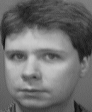

./ATnT/s23/10.pgm
[[128 123 128 ... 120 118 119]
 [125 122 126 ... 121 121 119]
 [124 121 124 ... 120 122 120]
 ...
 [ 78  77  90 ...  76  80  84]
 [ 94  87  72 ...  79  80  80]
 [ 65  72  97 ...  79  77  83]]
(112, 92)


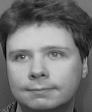

./ATnT/s23/8.pgm
[[126 124 125 ... 119 119 122]
 [122 124 123 ... 120 122 119]
 [124 124 123 ... 123 121 122]
 ...
 [ 78  70  75 ...  82  79  84]
 [ 71  77  80 ...  76  81  78]
 [ 73  89  97 ...  76  81  78]]
(112, 92)


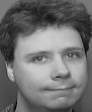

./ATnT/s27/3.pgm
[[46 42 46 ... 36 37 43]
 [43 45 44 ... 46 35 36]
 [42 40 47 ... 39 39 39]
 ...
 [62 49 53 ... 25 26 25]
 [60 55 48 ... 22 23 27]
 [62 52 52 ... 39 22 14]]
(112, 92)


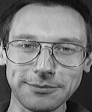

./ATnT/s27/4.pgm
[[39 46 42 ... 39 39 36]
 [48 44 45 ... 37 40 42]
 [42 47 43 ... 37 38 47]
 ...
 [60 53 48 ... 20 28 26]
 [65 45 48 ... 19 24 27]
 [52 55 54 ... 19 19 25]]
(112, 92)


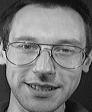

./ATnT/s27/9.pgm
[[42 44 39 ... 39 36 36]
 [42 41 42 ... 39 40 33]
 [40 47 40 ... 42 36 33]
 ...
 [71 68 65 ... 24 20 29]
 [73 70 68 ... 21 24 28]
 [74 68 70 ... 22 28 18]]
(112, 92)


./ATnT/s27/2.pgm
[[52 42 42 ... 37 39 38]
 [45 48 39 ... 34 37 40]
 [47 44 42 ... 35 41 39]
 ...
 [58 47 49 ... 27 19 25]
 [59 44 55 ... 16 23 23]
 [56 48 61 ... 37 19 24]]
(112, 92)


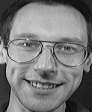

./ATnT/s27/5.pgm
[[46 45 42 ... 36 40 36]
 [37 49 45 ... 39 42 38]
 [51 39 50 ... 37 43 32]
 ...
 [58 54 50 ... 23 25 23]
 [58 53 50 ... 21 26 26]
 [61 49 55 ... 24 21 24]]
(112, 92)


./ATnT/s27/7.pgm
[[42 40 43 ... 34 34 37]
 [39 43 36 ... 30 40 30]
 [46 35 40 ... 33 38 35]
 ...
 [52 47 34 ... 29 19 29]
 [52 49 14 ... 23 21 22]
 [63 35 14 ... 23 23 18]]
(112, 92)


./ATnT/s27/1.pgm
[[41 49 45 ... 39 40 42]
 [38 49 44 ... 37 41 40]
 [48 45 48 ... 42 37 40]
 ...
 [51 55 40 ... 24 24 24]
 [53 53 27 ... 23 24 25]
 [52 56 11 ... 18 28 21]]
(112, 92)


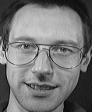

./ATnT/s27/6.pgm
[[38 46 38 ... 39 32 39]
 [41 43 42 ... 40 35 34]
 [45 37 43 ... 39 35 42]
 ...
 [71 74 69 ... 26 27 16]
 [71 77 68 ... 24 21 27]
 [75 70 72 ... 27 23 26]]
(112, 92)


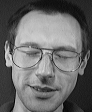

./ATnT/s27/10.pgm
[[40 40 41 ... 35 41 32]
 [46 48 38 ... 38 35 39]
 [46 45 46 ... 45 34 41]
 ...
 [64 59 58 ... 23 23 21]
 [69 64 62 ... 28 16 26]
 [70 66 58 ... 23 23 27]]
(112, 92)


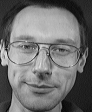

./ATnT/s27/8.pgm
[[39 43 39 ... 33 42 29]
 [45 39 46 ... 39 33 37]
 [41 40 42 ... 37 39 33]
 ...
 [69 73 64 ... 23 21 26]
 [71 70 71 ... 25 26 22]
 [69 70 77 ... 24 24 23]]
(112, 92)


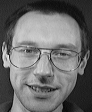

./ATnT/s5/3.pgm
[[131 129 130 ... 123 119 119]
 [129 132 129 ... 120 119 123]
 [130 130 131 ... 119 119 121]
 ...
 [100 104 101 ...  54  50  54]
 [ 97 103  99 ...  51  49  50]
 [100 102 107 ...  51  48  55]]
(112, 92)


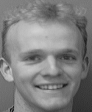

./ATnT/s5/4.pgm
[[130 133 129 ... 121 121 124]
 [131 132 135 ... 123 122 125]
 [132 130 132 ... 124 121 123]
 ...
 [108 111 114 ...  55  56  55]
 [116 129 124 ...  52  56  56]
 [129 126 112 ...  54  54  56]]
(112, 92)


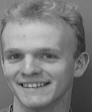

./ATnT/s5/9.pgm
[[126 127 126 ... 125 126 125]
 [126 129 126 ... 125 127 125]
 [128 124 129 ... 124 126 124]
 ...
 [ 86  89  91 ...  87  87  86]
 [101  98  97 ...  86  86  86]
 [100  98  99 ...  87  85  89]]
(112, 92)


./ATnT/s5/2.pgm
[[130 132 129 ... 119 123 124]
 [132 134 131 ... 121 121 118]
 [132 131 129 ... 121 123 123]
 ...
 [106 106 111 ...  56  49  52]
 [114 116 130 ...  54  50  54]
 [109 125 129 ...  53  50  52]]
(112, 92)


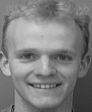

./ATnT/s5/5.pgm
[[128 125 126 ... 125 126 123]
 [127 127 124 ... 124 124 124]
 [127 127 124 ... 125 124 127]
 ...
 [ 87 102  94 ...  87  86  87]
 [103 105  92 ...  88  83  87]
 [ 92  92  89 ...  84  85  85]]
(112, 92)


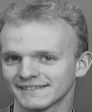

./ATnT/s5/7.pgm
[[131 133 128 ... 124 122 126]
 [130 133 131 ... 121 123 124]
 [130 134 130 ... 122 121 121]
 ...
 [104 104 102 ...  55  50  57]
 [104 102 107 ...  57  52  59]
 [111 113 117 ...  54  53  56]]
(112, 92)


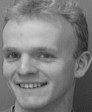

./ATnT/s5/1.pgm
[[133 132 131 ... 124 123 120]
 [133 130 130 ... 123 123 123]
 [131 132 130 ... 123 122 125]
 ...
 [105  99 106 ...  52  53  55]
 [106 101 107 ...  51  54  52]
 [108 112 116 ...  53  48  58]]
(112, 92)


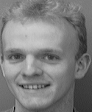

./ATnT/s5/6.pgm
[[128 128 128 ... 124 124 124]
 [128 127 126 ... 125 125 126]
 [128 128 125 ... 126 125 128]
 ...
 [112  91  92 ...  84  88  86]
 [102  83  91 ...  85  84  87]
 [ 89  90  86 ...  87  83  86]]
(112, 92)


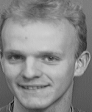

./ATnT/s5/10.pgm
[[124 125 125 ... 125 124 125]
 [126 126 126 ... 127 122 123]
 [126 126 126 ... 126 124 126]
 ...
 [ 80  86  84 ...  89  85  88]
 [ 86  83  82 ...  89  88  88]
 [ 89  81  82 ...  84  89  85]]
(112, 92)


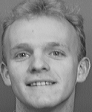

./ATnT/s5/8.pgm
[[132 127 128 ... 127 124 125]
 [129 126 129 ... 124 127 126]
 [129 128 125 ... 125 127 128]
 ...
 [118  86  96 ...  89  86  84]
 [122  81  97 ...  85  84  84]
 [118  79  93 ...  85  83  85]]
(112, 92)


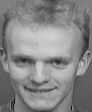

./ATnT/s9/3.pgm
[[ 97 105 107 ... 106 105 108]
 [104 102 106 ... 103 108 107]
 [107 106 103 ... 106 106 106]
 ...
 [138 138 139 ...  66  68  65]
 [138 139 138 ...  66  68  67]
 [135 143 144 ...  76  67  74]]
(112, 92)


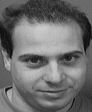

./ATnT/s9/4.pgm
[[114 110 112 ... 113 108 112]
 [112 109 110 ... 112 109 112]
 [113 109 111 ... 110 112 110]
 ...
 [136 136 136 ...  90  89  91]
 [137 137 139 ...  94  87  91]
 [138 135 139 ...  93  89  86]]
(112, 92)


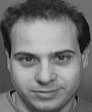

./ATnT/s9/9.pgm
[[110 112 113 ... 112 109 115]
 [108 116 113 ... 109 114 111]
 [114 110 112 ... 111 113 110]
 ...
 [141 142 141 ...  86  91  83]
 [141 141 139 ...  86  87  88]
 [137 143 137 ...  92  87  90]]
(112, 92)


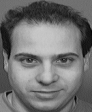

./ATnT/s9/2.pgm
[[100 110 107 ... 102 105 107]
 [105 108 105 ... 104 102 105]
 [107 106 105 ... 105 108 103]
 ...
 [129 127 132 ...  70  63  63]
 [138 130 134 ...  65  68  56]
 [138 130 131 ...  64  71  59]]
(112, 92)


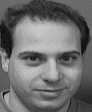

./ATnT/s9/5.pgm
[[110 109 111 ... 111 113 116]
 [108 111 109 ... 113 112 113]
 [108 109 111 ... 110 114 115]
 ...
 [137 137 141 ...  95  89  90]
 [140 133 144 ...  96  86  90]
 [142 136 138 ...  94  88  90]]
(112, 92)


./ATnT/s9/7.pgm
[[112 109 116 ... 110 112 110]
 [112 112 113 ... 114 110 113]
 [111 111 113 ... 113 110 110]
 ...
 [139 141 136 ...  93  87  93]
 [138 137 139 ...  94  90  94]
 [136 136 139 ...  93  88  92]]
(112, 92)


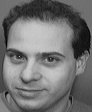

./ATnT/s9/1.pgm
[[105 102 106 ... 105 105 107]
 [105 105 104 ... 106 107 108]
 [100 105 104 ... 108 106 101]
 ...
 [140 139 140 ...  66  65  65]
 [144 138 142 ...  70  70  67]
 [144 141 137 ...  72  62  75]]
(112, 92)


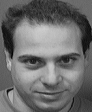

./ATnT/s9/6.pgm
[[113 112 111 ... 111 116 109]
 [114 114 113 ... 111 111 112]
 [113 114 113 ... 112 108 114]
 ...
 [137 140 137 ...  89  87  87]
 [139 136 142 ...  89  88  87]
 [137 137 141 ...  87  87  89]]
(112, 92)


./ATnT/s9/10.pgm
[[111 111 110 ... 105 115 107]
 [107 110 111 ... 111 111 111]
 [107 113 107 ... 113 112 112]
 ...
 [137 141 136 ...  74  85  88]
 [138 140 138 ...  83  81  87]
 [133 141 140 ...  88  79  90]]
(112, 92)


./ATnT/s9/8.pgm
[[111 114 112 ... 112 108 110]
 [112 113 111 ... 112 111 111]
 [113 109 112 ... 109 111 108]
 ...
 [141 135 133 ...  84  84  84]
 [137 135 136 ...  89  90  88]
 [138 135 138 ...  88  86  92]]
(112, 92)


./ATnT/s12/3.pgm
[[107 108 107 ... 107 114 106]
 [112 107 110 ... 111 111 110]
 [112 102 109 ... 112 113 110]
 ...
 [ 39  35  37 ...  35  34  23]
 [ 40  48  38 ...  42  36  40]
 [ 54  40  35 ...  28  39  43]]
(112, 92)


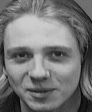

./ATnT/s12/4.pgm
[[111 110 111 ... 113 104 110]
 [112 111 114 ... 111 109 111]
 [112 109 112 ... 109 106 111]
 ...
 [ 40  36  35 ...  29  34  30]
 [ 30  36  47 ...  36  39  36]
 [ 44  37  39 ...  35  40  29]]
(112, 92)


./ATnT/s12/9.pgm
[[100 105 103 ... 110 109 113]
 [103 103 103 ... 110 110 109]
 [103 105 107 ... 111 110 109]
 ...
 [ 59  54  44 ...  40  32  45]
 [ 45  49  44 ...  34  36  44]
 [ 53  59  38 ...  41  37  37]]
(112, 92)


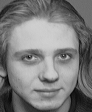

./ATnT/s12/2.pgm
[[106 110 107 ... 107 109 112]
 [105 109 107 ... 107 111 112]
 [106 107 107 ... 110 110 107]
 ...
 [ 40  35  30 ...  46  35  50]
 [ 35  30  28 ...  41  32  41]
 [ 32  38  23 ...  44  49  31]]
(112, 92)


./ATnT/s12/5.pgm
[[114 109 112 ... 117 109 111]
 [113 109 112 ... 111 111 111]
 [109 110 111 ... 113 109 113]
 ...
 [ 38  33  30 ...  42  32  31]
 [ 35  26  35 ...  34  47  42]
 [ 24  30  38 ...  37  35  38]]
(112, 92)


./ATnT/s12/7.pgm
[[111 106 106 ... 111 108 107]
 [108 107 108 ... 113 110 105]
 [108 109 108 ... 111 111 112]
 ...
 [ 50  31  36 ...  37  39  29]
 [ 40  31  32 ...  41  36  31]
 [ 39  39  33 ...  43  34  43]]
(112, 92)


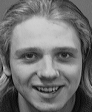

./ATnT/s12/1.pgm
[[104 101 105 ... 113 107 109]
 [104 103 105 ... 108 115 109]
 [102 102 107 ... 109 112 109]
 ...
 [ 41  35  56 ...  35  48  38]
 [ 49  41  43 ...  37  31  43]
 [ 39  38  55 ...  49  43  36]]
(112, 92)


./ATnT/s12/6.pgm
[[ 95 101  99 ... 109 109 110]
 [ 98  97  99 ... 110 108 111]
 [ 98  98  95 ... 111 110 109]
 ...
 [ 62  53  61 ...  25  42  39]
 [ 48  69  62 ...  31  45  43]
 [ 55  65  46 ...  40  42  53]]
(112, 92)


./ATnT/s12/10.pgm
[[105 104 104 ... 110 108 110]
 [105 104 104 ... 109 109 110]
 [107 101 108 ... 107 110 107]
 ...
 [ 41  44  48 ...  29  39  33]
 [ 38  39  38 ...  34  33  32]
 [ 31  38  47 ...  43  41  24]]
(112, 92)


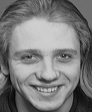

./ATnT/s12/8.pgm
[[106 105 106 ... 109 108 113]
 [107 108 106 ... 113 105 110]
 [109 109 106 ... 107 112 106]
 ...
 [ 31  37  39 ...  29  34  36]
 [ 27  36  39 ...  31  36  36]
 [ 23  40  33 ...  32  31  28]]
(112, 92)


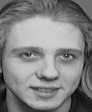

./ATnT/s38/3.pgm
[[103 109 105 ... 100  93 100]
 [104 109 103 ...  99  98  97]
 [106 108 101 ...  98 100  96]
 ...
 [170 111 116 ...  40  32  40]
 [166  93 119 ...  56  45  36]
 [161  97 122 ...  53  58  54]]
(112, 92)


./ATnT/s38/4.pgm
[[110 111 114 ... 106 107 105]
 [109 112 110 ... 104 104 106]
 [109 112 109 ... 101 106 102]
 ...
 [123 128 128 ...  70  69  68]
 [139 126 125 ...  70  67  65]
 [123 100 131 ...  65  72  65]]
(112, 92)


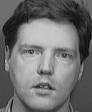

./ATnT/s38/9.pgm
[[108 112 109 ... 105 108 103]
 [113 111 111 ... 108 105 105]
 [113 109 113 ... 106 108 105]
 ...
 [ 94 138 115 ...  67  70  66]
 [119 148 112 ...  76  65  70]
 [130 148 101 ...  73  64  69]]
(112, 92)


./ATnT/s38/2.pgm
[[104 106 107 ...  99 100  97]
 [106 106 102 ...  96 100  99]
 [105 104 104 ... 101  95  94]
 ...
 [152 107  93 ...  59  52  42]
 [144  83 107 ...  72  63  67]
 [115  84 128 ...  65  59  73]]
(112, 92)


./ATnT/s38/5.pgm
[[105 109 105 ... 104 100 101]
 [108 102 105 ... 104  98  97]
 [104 106 105 ... 101  98 101]
 ...
 [148 111  83 ...  71  64  64]
 [135  86 112 ...  49  70  73]
 [113  84 125 ...  81  57  49]]
(112, 92)


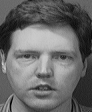

./ATnT/s38/7.pgm
[[106 104 104 ... 100  94 102]
 [108 106 105 ...  97  98 101]
 [104 106 101 ... 101  96 101]
 ...
 [126 125 151 ...  43  40  38]
 [ 99 119 142 ...  61  59  54]
 [115 152 106 ...  74  66  68]]
(112, 92)


./ATnT/s38/1.pgm
[[109 112 114 ... 104 108 109]
 [113 112 112 ... 105 107 105]
 [111 112 112 ... 108 105 103]
 ...
 [120  84 113 ...  71  71  68]
 [101  90 123 ...  72  71  71]
 [ 80 108 124 ...  69  72  69]]
(112, 92)


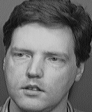

./ATnT/s38/6.pgm
[[114 112 110 ... 107 105 103]
 [109 115 113 ... 107 104 107]
 [110 112 111 ... 109 104 104]
 ...
 [136 155  95 ...  69  70  72]
 [144 140 106 ...  70  70  68]
 [148 129 107 ...  67  70  68]]
(112, 92)


./ATnT/s38/10.pgm
[[108 105 104 ... 101 100 101]
 [102 102 106 ... 104  99 101]
 [105 103 107 ... 103 100 104]
 ...
 [107 106 106 ...  67  69  46]
 [ 96 111 140 ...  69  58  80]
 [137 134 123 ...  72  73  48]]
(112, 92)


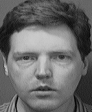

./ATnT/s38/8.pgm
[[113 109 113 ... 105 107 106]
 [110 111 112 ... 108 104 107]
 [110 112 111 ... 105 105 106]
 ...
 [137 151 105 ...  68  72  68]
 [149 135 106 ...  70  69  68]
 [152 126 120 ...  72  66  71]]
(112, 92)


./ATnT/s31/3.pgm
[[ 36  36  38 ...  29  31  35]
 [ 37  40  35 ...  35  31  28]
 [ 35  38  35 ...  33  33  25]
 ...
 [219 173 155 ... 213 166 188]
 [210 162 163 ... 211 185 164]
 [194 156 176 ... 210 205 144]]
(112, 92)


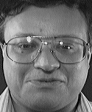

./ATnT/s31/4.pgm
[[ 35  39  38 ...  27  33  31]
 [ 38  37  38 ...  33  32  32]
 [ 40  37  38 ...  34  33  34]
 ...
 [198 157 171 ... 211 163 190]
 [185 155 188 ... 210 180 169]
 [170 154 202 ... 212 202 145]]
(112, 92)


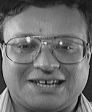

./ATnT/s31/9.pgm
[[ 98  98 101 ...  89  91  92]
 [ 96  97  98 ...  91  89  91]
 [ 99  98  97 ...  92  87  90]
 ...
 [134 152 140 ... 146 140 136]
 [139 152 141 ... 144 135 141]
 [144 146 146 ... 130 150 157]]
(112, 92)


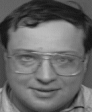

./ATnT/s31/2.pgm
[[ 37  36  35 ...  33  27  29]
 [ 36  34  35 ...  31  29  27]
 [ 36  34  35 ...  30  33  28]
 ...
 [184 154 188 ... 211 192 159]
 [172 152 204 ... 215 208 149]
 [163 167 213 ... 210 212 157]]
(112, 92)


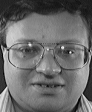

./ATnT/s31/5.pgm
[[ 37  36  34 ...  30  33  34]
 [ 44  35  40 ...  34  31  38]
 [ 40  35  42 ...  30  33  35]
 ...
 [215 167 154 ... 201 211 166]
 [204 159 164 ... 186 212 189]
 [189 155 179 ... 160 207 210]]
(112, 92)


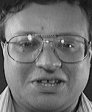

./ATnT/s31/7.pgm
[[ 97  99  98 ...  87  81  86]
 [101  97 100 ...  87  80  85]
 [100 100  98 ...  85  83  84]
 ...
 [ 56  62  66 ... 142 143 139]
 [ 53  68  81 ... 138 136 139]
 [ 68  81  91 ... 130 119 120]]
(112, 92)


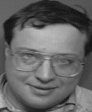

./ATnT/s31/1.pgm
[[ 94  98  94 ...  92  93  95]
 [ 97  95  98 ...  91  91  94]
 [ 94  96  95 ...  96  93  96]
 ...
 [172 172 169 ... 131 132 123]
 [182 166 150 ... 137 130 115]
 [172 159 138 ... 126 148 135]]
(112, 92)


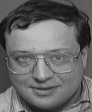

./ATnT/s31/6.pgm
[[ 99 103  98 ...  92  92  92]
 [100 102 101 ...  93  92  90]
 [101 102 102 ...  92  92  90]
 ...
 [104 154 139 ... 143 148 157]
 [101 147 154 ... 155 139 149]
 [104 148 160 ... 162 122 122]]
(112, 92)


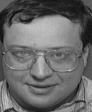

./ATnT/s31/10.pgm
[[ 29  39  35 ...  32  27  37]
 [ 33  41  37 ...  39  33  34]
 [ 35  39  39 ...  34  35  34]
 ...
 [195 201 154 ... 167 189 215]
 [190 204 147 ... 196 159 220]
 [179 189 138 ... 213 153 204]]
(112, 92)


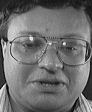

./ATnT/s31/8.pgm
[[ 96  94  98 ...  94  94  93]
 [ 96  96 102 ...  94  94  93]
 [ 96  97  99 ...  94  95  94]
 ...
 [169 162 142 ... 131 137 133]
 [141 137 165 ... 120 127 153]
 [153 162 171 ... 131 136 152]]
(112, 92)


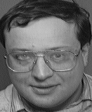

./ATnT/s18/3.pgm
[[117 120 122 ... 115 114 115]
 [123 118 124 ... 115 114 113]
 [121 122 122 ... 113 114 115]
 ...
 [ 89  86  94 ...  63  67  64]
 [ 93  89  88 ...  64  64  61]
 [ 83  89  85 ...  66  59  65]]
(112, 92)


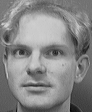

./ATnT/s18/4.pgm
[[123 121 121 ... 114 114 113]
 [118 121 122 ... 114 115 114]
 [120 119 122 ... 116 113 118]
 ...
 [ 90  93  83 ...  71  60  63]
 [ 80  82  77 ...  70  67  61]
 [ 69  78  67 ...  78  79  67]]
(112, 92)


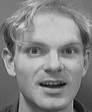

./ATnT/s18/9.pgm
[[119 118 119 ... 116 112 114]
 [121 119 119 ... 114 115 113]
 [117 121 118 ... 114 115 110]
 ...
 [ 92  88  87 ...  83  84  83]
 [ 94  90  88 ...  83  82  84]
 [ 93  89  81 ...  83  83  82]]
(112, 92)


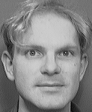

./ATnT/s18/2.pgm
[[122 120 125 ... 118 112 113]
 [125 121 121 ... 113 115 112]
 [120 119 120 ... 117 112 115]
 ...
 [ 89  86  88 ...  65  67  63]
 [ 91  88  85 ...  67  66  62]
 [ 92  91  87 ...  65  62  66]]
(112, 92)


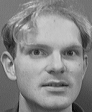

./ATnT/s18/5.pgm
[[122 120 121 ... 113 116 112]
 [122 120 117 ... 115 114 113]
 [121 123 122 ... 112 118 114]
 ...
 [ 92  85  89 ...  69  64  68]
 [ 87  90  88 ...  62  67  59]
 [ 88  85  91 ...  59  67  58]]
(112, 92)


./ATnT/s18/7.pgm
[[120 120 120 ... 113 113 109]
 [121 121 121 ... 112 114 111]
 [120 124 123 ... 112 114 114]
 ...
 [ 94  85  82 ...  85  86  85]
 [ 94  93  82 ...  82  83  84]
 [ 94  93  86 ...  82  87  79]]
(112, 92)


./ATnT/s18/1.pgm
[[121 119 121 ... 112 116 111]
 [118 122 121 ... 112 116 113]
 [121 120 120 ... 113 114 114]
 ...
 [ 87  76  74 ...  83  83  82]
 [ 81  71  71 ...  83  83  82]
 [ 82  65  66 ...  83  80  86]]
(112, 92)


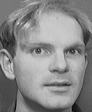

./ATnT/s18/6.pgm
[[118 123 120 ... 113 115 113]
 [120 123 119 ... 114 114 112]
 [119 124 119 ... 115 113 114]
 ...
 [ 94  84  90 ...  80  85  82]
 [ 91  88  85 ...  81  81  82]
 [ 75  79  83 ...  79  81  84]]
(112, 92)


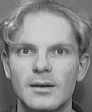

./ATnT/s18/10.pgm
[[122 119 123 ... 114 112 113]
 [122 118 119 ... 115 113 113]
 [121 120 120 ... 113 111 114]
 ...
 [ 96  93  95 ...  81  84  82]
 [ 94  94  93 ...  82  85  80]
 [ 96  93  90 ...  80  86  82]]
(112, 92)


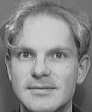

./ATnT/s18/8.pgm
[[121 120 122 ... 116 113 112]
 [120 121 119 ... 115 115 114]
 [120 122 120 ... 115 114 115]
 ...
 [ 87  94  94 ...  67  67  66]
 [ 91  89  92 ...  64  65  67]
 [ 89  94  90 ...  66  62  68]]
(112, 92)


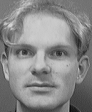

./ATnT/s14/3.pgm
[[ 52  39  51 ...  41  41  42]
 [ 53  49  49 ...  42  40  42]
 [ 48  49  49 ...  41  42  35]
 ...
 [145 154 117 ... 104 104 102]
 [165 153  97 ... 120 100 107]
 [147 126 169 ... 133 138 103]]
(112, 92)


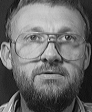

./ATnT/s14/4.pgm
[[ 44  48  51 ...  41  41  43]
 [ 46  50  45 ...  38  41  44]
 [ 50  51  43 ...  36  42  41]
 ...
 [186 198 164 ... 106 113 111]
 [174 149 144 ... 116 130 123]
 [136 150 154 ... 129 131 125]]
(112, 92)


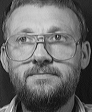

./ATnT/s14/9.pgm
[[ 41  42  47 ...  34  37  37]
 [ 41  46  43 ...  38  36  37]
 [ 42  45  47 ...  35  37  38]
 ...
 [ 43  47  47 ... 154 137 136]
 [128 128 127 ... 151 155 138]
 [135 152 190 ... 141 156 149]]
(112, 92)


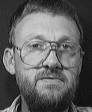

./ATnT/s14/2.pgm
[[ 44  50  46 ...  44  41  44]
 [ 51  46  48 ...  39  41  43]
 [ 48  46  48 ...  38  37  42]
 ...
 [145 148 144 ... 106 102 104]
 [151 167 100 ... 100 105 103]
 [150 155 138 ... 140 104  95]]
(112, 92)


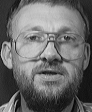

./ATnT/s14/5.pgm
[[ 46  50  45 ...  38  44  40]
 [ 49  45  51 ...  40  42  40]
 [ 50  50  49 ...  42  43  40]
 ...
 [188 166 188 ... 137 128 153]
 [148 152 220 ... 128 135 112]
 [126 197 188 ... 136 144  98]]
(112, 92)


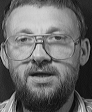

./ATnT/s14/7.pgm
[[ 44  44  47 ...  37  41  34]
 [ 43  46  50 ...  41  41  37]
 [ 48  44  48 ...  40  43  35]
 ...
 [ 43  49  47 ... 117 121 112]
 [115 128 129 ... 185 124 111]
 [127 134 142 ... 188 165 106]]
(112, 92)


./ATnT/s14/1.pgm
[[ 50  49  50 ...  41  42  38]
 [ 55  46  50 ...  39  39  36]
 [ 50  49  49 ...  37  42  38]
 ...
 [183 165 145 ... 118 114 105]
 [133 148 155 ... 120 118 116]
 [144 150 169 ... 159 111 117]]
(112, 92)


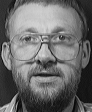

./ATnT/s14/6.pgm
[[ 47  46  46 ...  38  38  39]
 [ 47  45  47 ...  40  42  39]
 [ 45  47  45 ...  39  38  43]
 ...
 [ 39  47 132 ...  80  83  97]
 [ 81 164 204 ... 105  93 102]
 [185 200 162 ... 151 143  90]]
(112, 92)


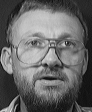

./ATnT/s14/10.pgm
[[ 43  46  43 ...  35  40  38]
 [ 46  43  43 ...  38  43  37]
 [ 49  45  43 ...  40  42  34]
 ...
 [153 146 134 ... 107 170 102]
 [146 155 120 ... 103 173 139]
 [142 142 141 ...  95 162 197]]
(112, 92)


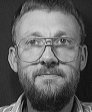

./ATnT/s14/8.pgm
[[ 51  46  48 ...  33  40  39]
 [ 46  50  44 ...  37  43  38]
 [ 48  47  45 ...  38  38  37]
 ...
 [ 46  31  72 ... 104 114 121]
 [ 91 100 176 ... 145 122 121]
 [148 197 197 ... 196 173 110]]
(112, 92)


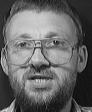

./ATnT/s16/3.pgm
[[61 62 64 ... 59 66 63]
 [59 63 61 ... 66 67 64]
 [60 63 63 ... 64 61 69]
 ...
 [55 54 53 ... 56 56 60]
 [55 55 54 ... 56 54 60]
 [54 49 55 ... 51 55 53]]
(112, 92)


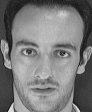

./ATnT/s16/4.pgm
[[ 72  73  77 ...  87  86  91]
 [ 73  71  69 ...  88  88  87]
 [ 72  70  70 ...  84  88  90]
 ...
 [ 54  55  49 ...  93  90  93]
 [ 48  52  49 ...  87  90  88]
 [ 49  57  48 ... 100  86  76]]
(112, 92)


./ATnT/s16/9.pgm
[[63 54 58 ... 61 61 59]
 [59 59 59 ... 59 61 61]
 [59 58 57 ... 60 65 63]
 ...
 [54 57 52 ... 64 61 65]
 [59 52 54 ... 68 61 62]
 [52 54 54 ... 63 63 64]]
(112, 92)


./ATnT/s16/2.pgm
[[60 57 59 ... 61 61 63]
 [58 60 59 ... 66 60 63]
 [59 59 60 ... 64 60 61]
 ...
 [54 51 54 ... 57 57 57]
 [54 53 50 ... 56 54 61]
 [54 52 46 ... 49 55 54]]
(112, 92)


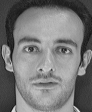

./ATnT/s16/5.pgm
[[ 69  76  69 ...  85  86  92]
 [ 69  72  70 ...  86  88  89]
 [ 66  71  69 ...  86  91  88]
 ...
 [ 46  50  53 ...  92  90  95]
 [ 51  50  50 ...  90  91  77]
 [ 54  47  52 ... 104 121  93]]
(112, 92)


./ATnT/s16/7.pgm
[[61 58 59 ... 60 61 62]
 [61 62 54 ... 64 56 61]
 [58 64 60 ... 65 55 59]
 ...
 [56 51 52 ... 61 63 61]
 [48 53 51 ... 61 64 59]
 [48 52 51 ... 59 64 61]]
(112, 92)


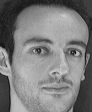

./ATnT/s16/1.pgm
[[41 43 43 ... 57 56 61]
 [41 39 38 ... 53 59 56]
 [37 38 39 ... 51 59 52]
 ...
 [37 33 30 ... 49 49 48]
 [31 33 30 ... 50 42 48]
 [38 56 77 ... 45 47 46]]
(112, 92)


./ATnT/s16/6.pgm
[[46 45 49 ... 45 45 44]
 [47 49 49 ... 44 46 45]
 [50 49 49 ... 42 47 47]
 ...
 [61 56 59 ... 59 55 58]
 [57 57 56 ... 56 57 59]
 [57 55 54 ... 56 60 58]]
(112, 92)


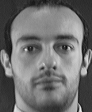

./ATnT/s16/10.pgm
[[59 60 59 ... 65 65 64]
 [58 60 61 ... 63 61 60]
 [59 57 61 ... 58 65 60]
 ...
 [52 55 53 ... 57 60 61]
 [55 57 54 ... 54 60 54]
 [52 56 49 ... 55 53 56]]
(112, 92)


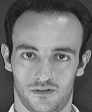

./ATnT/s16/8.pgm
[[63 60 63 ... 62 61 66]
 [58 60 65 ... 68 61 63]
 [61 61 60 ... 62 65 57]
 ...
 [60 51 60 ... 63 62 68]
 [52 50 46 ... 64 64 61]
 [55 50 24 ... 63 69 58]]
(112, 92)


./ATnT/s26/3.pgm
[[108 107 106 ... 111 109 106]
 [108 110 109 ... 107 108 103]
 [107 111 106 ... 102 108 107]
 ...
 [111 104 102 ...  35  44  45]
 [105 105  96 ...  44  36  44]
 [104 106  94 ...  43  43  40]]
(112, 92)


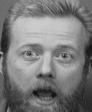

./ATnT/s26/4.pgm
[[112 107 111 ... 106 110 104]
 [107 110 102 ... 109 106 107]
 [109 106 112 ... 105 109 108]
 ...
 [ 61  81 170 ...  47  48  48]
 [ 70  71 168 ...  46  44  50]
 [ 80  59 153 ...  39  45  57]]
(112, 92)


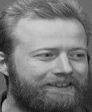

./ATnT/s26/9.pgm
[[112 109 110 ... 112 110 111]
 [108 112 110 ... 113 112 111]
 [110 110 112 ... 114 107 116]
 ...
 [107 107 107 ...  71  77  78]
 [110 108 104 ...  59  77  77]
 [109 108 104 ...  65  69  83]]
(112, 92)


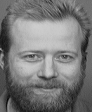

./ATnT/s26/2.pgm
[[115 108 109 ... 106 108 109]
 [108 107 111 ... 107 107 107]
 [106 109 106 ... 110 107 108]
 ...
 [ 96  84  73 ...  48  40  47]
 [ 91  87  75 ...  49  50  51]
 [100  80  84 ...  48  47  48]]
(112, 92)


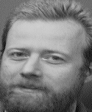

./ATnT/s26/5.pgm
[[113 105 109 ... 102 108 108]
 [109 105 111 ... 110 103 106]
 [107 108 107 ... 110 101 107]
 ...
 [110  94  95 ...  41  55  40]
 [103 106  95 ...  47  44  47]
 [104 104  95 ...  48  37  51]]
(112, 92)


./ATnT/s26/7.pgm
[[112 109 111 ... 112 110 113]
 [109 111 112 ... 114 112 111]
 [109 111 111 ... 110 113 110]
 ...
 [ 93  79  72 ...  75  75  75]
 [ 96  78  67 ...  71  77  73]
 [ 96  81  60 ...  74  75  74]]
(112, 92)


./ATnT/s26/1.pgm
[[109 105 112 ... 109 107 108]
 [106 113 105 ... 107 107 107]
 [105 111 108 ... 108 107 104]
 ...
 [101  92  95 ...  48  48  44]
 [ 99  91  97 ...  56  49  44]
 [101  88  90 ...  55  50  51]]
(112, 92)


./ATnT/s26/6.pgm
[[111 111 108 ... 111 112 111]
 [109 110 110 ... 111 109 110]
 [110 108 112 ... 109 108 113]
 ...
 [110 104  94 ...  58  64  66]
 [108 101  98 ...  62  59  61]
 [107 105 105 ...  66  64  59]]
(112, 92)


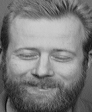

./ATnT/s26/10.pgm
[[109 111 110 ... 111 110 110]
 [110 110 112 ... 112 111 109]
 [109 114 109 ... 112 110 110]
 ...
 [112 104  98 ...  73  73  70]
 [108 101  96 ...  75  69  71]
 [107 105  94 ...  75  69  68]]
(112, 92)


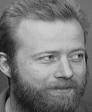

./ATnT/s26/8.pgm
[[108 108 111 ... 107 112 108]
 [111 111 111 ... 113 110 109]
 [112 111 110 ... 112 111 109]
 ...
 [ 98  94  88 ...  69  67  68]
 [ 99  92  85 ...  63  74  73]
 [101  87  97 ...  64  71  75]]
(112, 92)


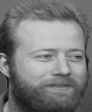

./ATnT/s7/3.pgm
[[48 52 48 ... 61 61 59]
 [54 51 53 ... 63 59 63]
 [51 53 55 ... 60 58 62]
 ...
 [49 51 48 ... 63 61 69]
 [52 51 47 ... 65 63 65]
 [50 50 50 ... 65 61 63]]
(112, 92)


./ATnT/s7/4.pgm
[[68 68 69 ... 69 70 75]
 [68 69 73 ... 70 78 76]
 [69 67 67 ... 73 73 75]
 ...
 [52 56 52 ... 69 73 72]
 [52 55 55 ... 73 67 71]
 [58 54 59 ... 73 67 69]]
(112, 92)


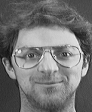

./ATnT/s7/9.pgm
[[49 48 49 ... 62 58 62]
 [48 51 50 ... 57 60 62]
 [49 49 51 ... 59 62 59]
 ...
 [50 50 48 ... 65 57 62]
 [46 54 50 ... 67 63 54]
 [47 51 51 ... 63 63 56]]
(112, 92)


./ATnT/s7/2.pgm
[[48 52 51 ... 56 56 49]
 [48 47 52 ... 58 59 54]
 [52 50 44 ... 60 57 57]
 ...
 [49 54 48 ... 54 50 55]
 [51 50 47 ... 55 50 56]
 [53 48 53 ... 56 56 55]]
(112, 92)


./ATnT/s7/5.pgm
[[67 64 67 ... 69 69 77]
 [70 66 69 ... 67 73 71]
 [67 66 62 ... 71 71 71]
 ...
 [48 46 50 ... 65 72 82]
 [50 50 49 ... 72 67 71]
 [49 48 52 ... 73 69 72]]
(112, 92)


./ATnT/s7/7.pgm
[[54 51 49 ... 58 56 57]
 [54 49 52 ... 58 60 56]
 [51 51 55 ... 62 59 57]
 ...
 [48 49 46 ... 57 66 61]
 [49 47 52 ... 62 60 62]
 [47 48 51 ... 61 59 63]]
(112, 92)


./ATnT/s7/1.pgm
[[51 49 53 ... 61 61 54]
 [52 51 50 ... 60 61 55]
 [51 49 50 ... 59 62 59]
 ...
 [52 51 49 ... 63 59 63]
 [48 50 49 ... 64 58 61]
 [49 48 48 ... 61 61 57]]
(112, 92)


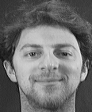

./ATnT/s7/6.pgm
[[53 51 49 ... 60 58 59]
 [53 55 51 ... 59 60 61]
 [49 56 50 ... 62 57 65]
 ...
 [48 51 56 ... 57 65 61]
 [50 55 50 ... 58 61 64]
 [48 55 53 ... 58 64 60]]
(112, 92)


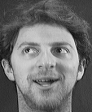

./ATnT/s7/10.pgm
[[66 68 66 ... 74 72 80]
 [70 67 70 ... 78 76 74]
 [71 69 68 ... 74 75 75]
 ...
 [49 49 50 ... 69 72 72]
 [49 49 52 ... 73 69 76]
 [49 49 49 ... 72 72 76]]
(112, 92)


./ATnT/s7/8.pgm
[[48 47 53 ... 61 59 60]
 [50 48 52 ... 56 61 58]
 [53 47 53 ... 54 64 60]
 ...
 [50 55 49 ... 64 67 59]
 [52 50 49 ... 63 65 60]
 [52 49 50 ... 61 66 67]]
(112, 92)


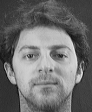

./ATnT/s13/3.pgm
[[108 111 110 ... 113 114 115]
 [110 108 110 ... 114 116 116]
 [105 110 107 ... 113 115 113]
 ...
 [ 81  84  90 ...  48  57  47]
 [ 83  93  83 ...  54  52  53]
 [ 85  90  88 ...  53  48  56]]
(112, 92)


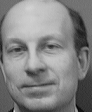

./ATnT/s13/4.pgm
[[104 105 102 ... 113 115 113]
 [102 106 100 ... 114 114 114]
 [103 104 103 ... 117 114 113]
 ...
 [ 77  81  87 ...  46  53  52]
 [ 81  80  84 ...  17  54  51]
 [ 85  83  83 ...  20  28  34]]
(112, 92)


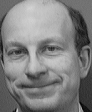

./ATnT/s13/9.pgm
[[110 106 106 ... 117 117 122]
 [109 103 109 ... 119 119 121]
 [107 104 108 ... 119 117 120]
 ...
 [ 24  21  28 ...  23  19  24]
 [ 22  22  24 ...  20  18  21]
 [ 20  30  25 ...  19  21  19]]
(112, 92)


./ATnT/s13/2.pgm
[[108 109 110 ... 112 115 108]
 [107 106 105 ... 109 114 110]
 [105 108 108 ... 110 111 112]
 ...
 [ 23   9  78 ...  49  48  49]
 [ 29   6 103 ...  33  43  48]
 [ 29   8 101 ...  24  23  30]]
(112, 92)


./ATnT/s13/5.pgm
[[108 112 110 ... 119 119 122]
 [111 110 113 ... 121 120 120]
 [111 111 111 ... 119 119 120]
 ...
 [ 23  23  20 ...  23  35  62]
 [ 27  28  23 ...  24  20  27]
 [ 25  25  19 ...  22  30  20]]
(112, 92)


./ATnT/s13/7.pgm
[[113 110 110 ... 120 121 118]
 [112 110 111 ... 119 119 118]
 [113 111 113 ... 120 120 120]
 ...
 [ 28  24  21 ...  23  20  17]
 [ 20  23  27 ...  20  21  16]
 [ 24  23  21 ...  21  21  20]]
(112, 92)


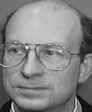

./ATnT/s13/1.pgm
[[106 109 105 ... 111 108 113]
 [108 109 108 ... 109 113 111]
 [108 111 107 ... 112 113 113]
 ...
 [ 22  23  23 ...  51  46  52]
 [ 19  19  28 ...  45  50  46]
 [ 17  31  16 ...  35  45  48]]
(112, 92)


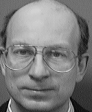

./ATnT/s13/6.pgm
[[110 110 112 ... 119 122 117]
 [109 110 111 ... 117 119 115]
 [112 111 111 ... 122 120 117]
 ...
 [  3  78 151 ...  40  75  75]
 [  0  87 153 ...  15  33  44]
 [  0  93 164 ...  20  31  16]]
(112, 92)


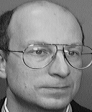

./ATnT/s13/10.pgm
[[105 110 106 ... 120 118 119]
 [105 110 109 ... 117 119 119]
 [108 109 109 ... 120 119 122]
 ...
 [ 17  25  21 ...  20  30  59]
 [ 24  23  28 ...  20  24  20]
 [ 23  27  26 ...  18  27  22]]
(112, 92)


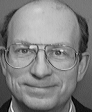

./ATnT/s13/8.pgm
[[111 112 110 ... 118 121 119]
 [108 114 110 ... 120 122 121]
 [113 109 112 ... 118 121 122]
 ...
 [ 21  23  23 ...  24  17  20]
 [ 24  23  21 ...  21  21  19]
 [ 24  20  22 ...  21  20  17]]
(112, 92)


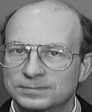

./ATnT/s17/3.pgm
[[53 52 61 ... 56 62 59]
 [53 57 59 ... 57 56 57]
 [58 57 58 ... 61 57 57]
 ...
 [54 55 54 ... 38 44 40]
 [62 51 53 ... 46 39 44]
 [57 56 51 ... 46 45 45]]
(112, 92)


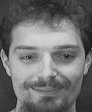

./ATnT/s17/4.pgm
[[50 57 56 ... 58 56 57]
 [52 56 60 ... 58 57 55]
 [52 56 58 ... 59 56 57]
 ...
 [52 56 56 ... 41 46 43]
 [59 53 54 ... 40 46 42]
 [58 56 53 ... 39 46 43]]
(112, 92)


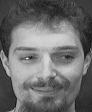

./ATnT/s17/9.pgm
[[ 45  52  48 ...  53  52  56]
 [ 44  48  48 ...  55  53  55]
 [ 48  47  55 ...  56  57  52]
 ...
 [ 48  51  57 ...  47  49  45]
 [106 111 119 ...  44  52  43]
 [125 126 124 ...  48  43  47]]
(112, 92)


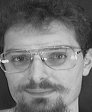

./ATnT/s17/2.pgm
[[53 58 57 ... 56 56 58]
 [56 58 55 ... 57 55 58]
 [57 55 60 ... 59 54 57]
 ...
 [55 52 51 ... 45 43 42]
 [54 57 54 ... 44 41 42]
 [57 55 52 ... 38 47 39]]
(112, 92)


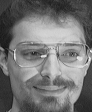

./ATnT/s17/5.pgm
[[52 56 60 ... 48 55 57]
 [51 59 54 ... 53 62 56]
 [57 54 59 ... 55 54 58]
 ...
 [55 52 58 ... 38 44 42]
 [50 49 55 ... 49 40 42]
 [49 51 51 ... 39 41 44]]
(112, 92)


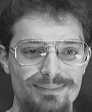

./ATnT/s17/7.pgm
[[52 41 48 ... 55 54 54]
 [49 46 48 ... 53 56 48]
 [53 46 50 ... 54 54 53]
 ...
 [47 38 48 ... 40 53 45]
 [44 43 49 ... 43 49 47]
 [51 76 83 ... 44 43 46]]
(112, 92)


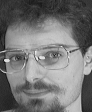

./ATnT/s17/1.pgm
[[ 56  61  54 ...  54  55  54]
 [ 53  61  56 ...  55  54  59]
 [ 60  59  57 ...  59  54  60]
 ...
 [ 72 105 134 ...  39  44  41]
 [142 145 146 ...  39  41  41]
 [155 142 159 ...  40  43  45]]
(112, 92)


./ATnT/s17/6.pgm
[[ 47  43  48 ...  50  53  55]
 [ 47  46  48 ...  52  51  52]
 [ 46  49  45 ...  54  52  55]
 ...
 [ 47  47  42 ...  47  48  49]
 [ 44  57  59 ...  49  50  50]
 [102 115 122 ...  45  49  50]]
(112, 92)


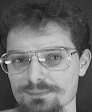

./ATnT/s17/10.pgm
[[ 49  45  46 ...  54  54  52]
 [ 45  47  48 ...  55  51  54]
 [ 46  48  48 ...  54  51  51]
 ...
 [ 44  44  42 ...  49  49  44]
 [ 50  58  68 ...  46  44  43]
 [112 118 121 ...  43  42  45]]
(112, 92)


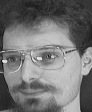

./ATnT/s17/8.pgm
[[48 45 50 ... 57 57 54]
 [46 50 47 ... 57 52 57]
 [51 47 52 ... 54 58 52]
 ...
 [46 49 47 ... 51 47 52]
 [48 48 44 ... 45 51 46]
 [50 45 45 ... 46 50 53]]
(112, 92)


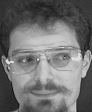

./ATnT/s36/3.pgm
[[48 42 52 ... 58 52 54]
 [46 46 47 ... 62 50 54]
 [44 49 48 ... 55 58 55]
 ...
 [34 32 31 ... 52 51 44]
 [33 36 32 ... 48 52 49]
 [32 35 29 ... 46 51 48]]
(112, 92)


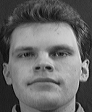

./ATnT/s36/4.pgm
[[48 43 51 ... 55 56 58]
 [46 46 44 ... 59 58 59]
 [44 44 46 ... 58 59 59]
 ...
 [30 35 34 ... 41 39 53]
 [29 37 33 ... 41 38 44]
 [33 34 35 ... 45 42 39]]
(112, 92)


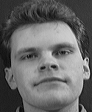

./ATnT/s36/9.pgm
[[45 45 48 ... 53 51 54]
 [46 42 49 ... 53 52 55]
 [44 48 45 ... 48 58 48]
 ...
 [34 32 33 ... 47 42 38]
 [37 29 34 ... 59 52 47]
 [37 31 36 ... 76 79 70]]
(112, 92)


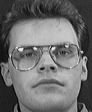

./ATnT/s36/2.pgm
[[46 45 47 ... 47 46 48]
 [45 48 42 ... 46 46 47]
 [46 48 45 ... 49 46 49]
 ...
 [42 38 42 ... 48 46 40]
 [41 43 41 ... 51 48 44]
 [40 37 43 ... 46 50 50]]
(112, 92)


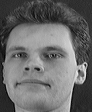

./ATnT/s36/5.pgm
[[62 64 64 ... 80 77 79]
 [63 66 67 ... 76 77 81]
 [67 66 67 ... 77 77 84]
 ...
 [65 63 57 ... 49 51 58]
 [60 56 46 ... 45 50 50]
 [54 53 46 ... 45 44 52]]
(112, 92)


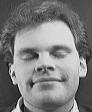

./ATnT/s36/7.pgm
[[46 48 41 ... 46 51 52]
 [51 46 47 ... 52 47 53]
 [46 48 46 ... 51 53 45]
 ...
 [43 44 37 ... 37 39 40]
 [44 39 42 ... 34 39 40]
 [38 41 41 ... 35 36 37]]
(112, 92)


./ATnT/s36/1.pgm
[[63 67 65 ... 78 76 79]
 [68 65 65 ... 81 72 78]
 [65 63 68 ... 77 76 76]
 ...
 [53 58 51 ... 74 65 66]
 [55 56 53 ... 68 69 81]
 [62 60 66 ... 54 61 69]]
(112, 92)


./ATnT/s36/6.pgm
[[46 41 45 ... 49 39 51]
 [47 45 47 ... 45 50 45]
 [46 48 46 ... 50 48 49]
 ...
 [40 41 38 ... 39 37 38]
 [38 43 45 ... 41 35 40]
 [36 40 38 ... 37 34 43]]
(112, 92)


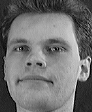

./ATnT/s36/10.pgm
[[47 42 53 ... 49 42 55]
 [44 44 49 ... 52 51 48]
 [49 43 49 ... 50 46 53]
 ...
 [35 26 29 ... 42 54 45]
 [35 29 31 ... 35 49 56]
 [26 34 33 ... 36 70 82]]
(112, 92)


./ATnT/s36/8.pgm
[[ 48  47  47 ...  60  57  59]
 [ 46  46  51 ...  59  59  63]
 [ 50  47  49 ...  59  59  61]
 ...
 [ 37  35  37 ...  51  46  47]
 [ 37  36  38 ...  48  45  46]
 [ 37  41  40 ... 120 104  66]]
(112, 92)


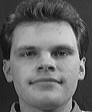

./ATnT/s34/3.pgm
[[ 28  25  28 ...  23  21  24]
 [ 29  27  25 ...  22  22  20]
 [ 29  27  24 ...  24  20  23]
 ...
 [202 200 190 ... 168 171 175]
 [201 201 192 ... 178 173 176]
 [193 202 189 ... 182 183 178]]
(112, 92)


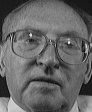

./ATnT/s34/4.pgm
[[ 25  25  23 ...  19  22  22]
 [ 25  27  24 ...  20  21  24]
 [ 26  26  24 ...  21  20  23]
 ...
 [189 181 181 ... 184 188 188]
 [190 186 182 ... 188 189 189]
 [191 188 182 ... 187 190 192]]
(112, 92)


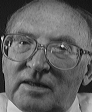

./ATnT/s34/9.pgm
[[ 23  24  26 ...  18  19  19]
 [ 25  23  25 ...  18  21  20]
 [ 23  24  25 ...  18  18  22]
 ...
 [203 199 203 ... 177 182 183]
 [198 193 198 ... 182 184 186]
 [200 198 195 ... 185 187 186]]
(112, 92)


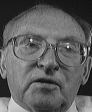

./ATnT/s34/2.pgm
[[ 24  26  27 ...  25  16  28]
 [ 27  26  27 ...  26  16  26]
 [ 23  28  27 ...  26  20  25]
 ...
 [195 185 189 ... 173 176 175]
 [192 184 188 ... 183 178 179]
 [195 186 181 ... 183 181 181]]
(112, 92)


./ATnT/s34/5.pgm
[[ 22  19  24 ...  12   9  18]
 [ 22  21  21 ...  17  16  17]
 [ 22  22  22 ...  17  18  18]
 ...
 [188 181 171 ... 158 153 150]
 [190 181 170 ... 153 151 157]
 [194 181 170 ... 150 158 166]]
(112, 92)


./ATnT/s34/7.pgm
[[ 19  23  20 ...  17  16  15]
 [ 22  22  19 ...  17  18  18]
 [ 22  24  18 ...  18  17  17]
 ...
 [169 160 157 ... 156 167 177]
 [169 158 154 ... 164 171 176]
 [168 160 154 ... 169 173 175]]
(112, 92)


./ATnT/s34/1.pgm
[[ 28  25  27 ...  20  22  23]
 [ 24  27  27 ...  18  24  22]
 [ 28  26  27 ...  24  22  23]
 ...
 [188 180 171 ... 183 188 188]
 [190 185 173 ... 185 188 190]
 [194 186 178 ... 187 187 190]]
(112, 92)


./ATnT/s34/6.pgm
[[ 24  26  22 ...  19  22  17]
 [ 27  23  27 ...  18  24  19]
 [ 23  28  26 ...  23  22  21]
 ...
 [198 196 192 ... 186 189 190]
 [200 198 194 ... 185 185 181]
 [201 199 196 ... 184 180 178]]
(112, 92)


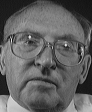

./ATnT/s34/10.pgm
[[ 25  17  26 ...  17  19  19]
 [ 25  24  22 ...  22  16  22]
 [ 24  26  22 ...  20  19  21]
 ...
 [198 199 196 ... 181 182 187]
 [197 193 196 ... 182 183 188]
 [201 196 193 ... 187 187 187]]
(112, 92)


./ATnT/s34/8.pgm
[[ 25  24  26 ...  21  20  18]
 [ 23  27  24 ...  19  19  19]
 [ 23  24  28 ...  20  23  16]
 ...
 [202 196 186 ... 188 184 195]
 [195 197 184 ... 186 187 194]
 [198 193 190 ... 186 189 187]]
(112, 92)


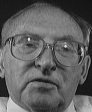

./ATnT/s6/3.pgm
[[139 143 146 ... 145 146 146]
 [141 148 141 ... 143 143 144]
 [145 142 141 ... 143 146 145]
 ...
 [170 203 218 ...  80  77  80]
 [222 224 223 ...  84  75  84]
 [222 223 221 ...  83  81  74]]
(112, 92)


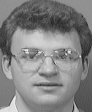

./ATnT/s6/4.pgm
[[156 158 155 ... 153 149 152]
 [156 155 156 ... 152 152 152]
 [155 156 155 ... 150 152 148]
 ...
 [133 142 151 ... 113 113 112]
 [158 198 216 ... 111 111 112]
 [219 219 217 ... 113 110 108]]
(112, 92)


./ATnT/s6/9.pgm
[[154 155 151 ... 148 151 148]
 [156 154 154 ... 149 151 147]
 [152 155 155 ... 148 152 150]
 ...
 [102 109 109 ... 113 111 112]
 [125 123 134 ... 114 111 113]
 [141 132 124 ... 108 113 110]]
(112, 92)


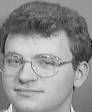

./ATnT/s6/2.pgm
[[144 144 145 ... 145 145 145]
 [144 145 144 ... 143 146 145]
 [145 145 145 ... 145 147 143]
 ...
 [153 158 186 ...  81  81  79]
 [192 216 224 ...  85  80  79]
 [226 222 223 ...  76  78  82]]
(112, 92)


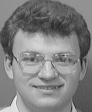

./ATnT/s6/5.pgm
[[153 152 152 ... 151 151 149]
 [153 154 155 ... 147 148 151]
 [155 151 157 ... 150 151 150]
 ...
 [134 141 146 ... 109 112 111]
 [143 135 132 ... 109 113 109]
 [139 139 184 ... 110 108 114]]
(112, 92)


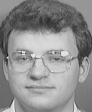

./ATnT/s6/7.pgm
[[157 152 154 ... 152 150 151]
 [155 152 156 ... 151 151 150]
 [153 153 154 ... 152 150 151]
 ...
 [105 104 115 ... 111 113 110]
 [115 122 146 ... 109 113 110]
 [135 144 157 ... 111 108 109]]
(112, 92)


./ATnT/s6/1.pgm
[[143 144 142 ... 147 144 141]
 [145 141 144 ... 146 145 142]
 [144 143 143 ... 147 143 144]
 ...
 [213 223 222 ...  83  78  75]
 [223 222 221 ...  79  79  80]
 [222 222 220 ...  79  79  80]]
(112, 92)


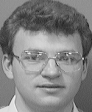

./ATnT/s6/6.pgm
[[155 154 154 ... 148 151 149]
 [154 153 152 ... 151 151 150]
 [153 153 153 ... 151 151 150]
 ...
 [147 144 145 ... 108 113 108]
 [159 142 133 ... 109 111 110]
 [150 162 206 ... 111 111 108]]
(112, 92)


./ATnT/s6/10.pgm
[[157 154 154 ... 152 149 150]
 [153 156 154 ... 150 151 150]
 [153 152 156 ... 152 150 151]
 ...
 [148 143 138 ... 112 108 111]
 [135 131 151 ... 108 112 106]
 [148 193 217 ... 105 110 106]]
(112, 92)


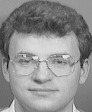

./ATnT/s6/8.pgm
[[155 154 153 ... 150 151 150]
 [152 154 151 ... 151 150 149]
 [155 154 154 ... 151 150 151]
 ...
 [133 140 150 ... 111 111 110]
 [161 145 141 ... 115 110 111]
 [165 141 156 ... 113 110 111]]
(112, 92)


./ATnT/s29/3.pgm
[[104  98 100 ...  93  96  93]
 [ 97 101 101 ...  93  94  93]
 [ 99 100 100 ...  97  98  91]
 ...
 [ 92  92  89 ...  56  52  51]
 [ 88  88  93 ...  51  53  50]
 [ 84  92  90 ...  52  49  53]]
(112, 92)


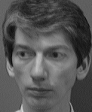

./ATnT/s29/4.pgm
[[105 107 104 ... 105  97 105]
 [107 103 107 ... 106 101 104]
 [105 105 107 ... 103 103 100]
 ...
 [ 75  79  75 ...  74  77  77]
 [ 74  80  77 ...  72  77  77]
 [ 77  78  77 ...  77  76  75]]
(112, 92)


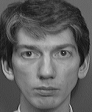

./ATnT/s29/9.pgm
[[ 98 103  98 ...  93  92  95]
 [104 100 104 ...  93  95  93]
 [102 100  99 ...  97  93  93]
 ...
 [ 95  88  94 ...  50  50  50]
 [ 93  91  95 ...  55  49  54]
 [ 94  93  96 ...  57  50  48]]
(112, 92)


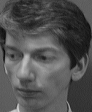

./ATnT/s29/2.pgm
[[101 100  99 ...  87  94  90]
 [ 98 100 101 ...  92  94  92]
 [103  97  97 ...  89  97  92]
 ...
 [ 90  88  93 ...  51  52  52]
 [ 93  89  93 ...  50  52  51]
 [ 86  93  92 ...  49  52  52]]
(112, 92)


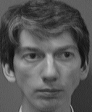

./ATnT/s29/5.pgm
[[103 104 105 ... 102 103 103]
 [104 105 105 ... 103 102 100]
 [105 102 105 ... 102  99 101]
 ...
 [ 73  70  71 ...  78  73  79]
 [ 71  72  72 ...  79  75  78]
 [ 72  74  72 ...  76  76  75]]
(112, 92)


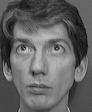

./ATnT/s29/7.pgm
[[104 101 104 ... 104 102 103]
 [104 104 103 ... 103 101 101]
 [102 106 102 ... 101 103 102]
 ...
 [ 73  69  70 ...  76  78  73]
 [ 73  74  72 ...  75  75  79]
 [ 75  75  73 ...  78  73  79]]
(112, 92)


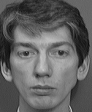

./ATnT/s29/1.pgm
[[ 98 100  99 ...  93  92  96]
 [ 97 103  99 ...  94  93  96]
 [ 98  97  98 ...  92  93  95]
 ...
 [ 85  92  91 ...  50  56  48]
 [ 85  94  87 ...  52  50  50]
 [ 90  91  92 ...  53  48  52]]
(112, 92)


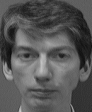

./ATnT/s29/6.pgm
[[102 105 104 ... 101 101 105]
 [106 102 101 ... 102 102 101]
 [105 100 103 ... 101 101 104]
 ...
 [ 69  70  68 ...  78  72  78]
 [ 69  69  71 ...  73  77  75]
 [ 69  69  72 ...  74  74  75]]
(112, 92)


./ATnT/s29/10.pgm
[[ 99 102  97 ...  94  93  90]
 [ 99  97 100 ...  94  95  91]
 [ 97  98 100 ...  91  93  95]
 ...
 [ 88  92  91 ...  53  52  54]
 [ 90  88  93 ...  51  52  50]
 [ 88  89  93 ...  50  53  50]]
(112, 92)


./ATnT/s29/8.pgm
[[105 106 100 ...  98 106 103]
 [105 105 105 ... 103 103 101]
 [105 105 108 ... 104 103 102]
 ...
 [ 76  67  69 ...  74  78  77]
 [ 71  71  68 ...  77  77  79]
 [ 73  71  66 ...  76  76  76]]
(112, 92)


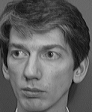

./ATnT/s39/3.pgm
[[ 74  74  76 ...  67  65  67]
 [ 72  75  75 ...  68  65  68]
 [ 81  72  77 ...  66  68  65]
 ...
 [183 186 186 ... 118 121 113]
 [185 190 189 ... 128 125 114]
 [186 190 190 ... 135 127 118]]
(112, 92)


./ATnT/s39/4.pgm
[[ 74  74  78 ...  67  63  67]
 [ 75  76  74 ...  66  66  65]
 [ 75  77  74 ...  66  66  64]
 ...
 [173 182 187 ... 100  84  56]
 [177 184 184 ... 103 113 106]
 [177 184 186 ... 109 113 120]]
(112, 92)


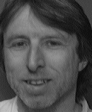

./ATnT/s39/9.pgm
[[ 86  90  87 ...  84  86  85]
 [ 85  88  90 ...  81  86  86]
 [ 87  88  89 ...  83  85  83]
 ...
 [199 199 196 ... 122 122 125]
 [196 190 191 ... 127 126 124]
 [192 199 201 ... 127 124 126]]
(112, 92)


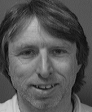

./ATnT/s39/2.pgm
[[ 75  77  75 ...  65  65  63]
 [ 75  74  77 ...  67  67  64]
 [ 76  74  75 ...  66  65  65]
 ...
 [192 193 192 ...  74  64  55]
 [193 194 188 ... 108 102  88]
 [191 192 187 ... 116 114 113]]
(112, 92)


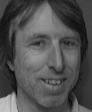

./ATnT/s39/5.pgm
[[ 87  93  84 ...  78  79  77]
 [ 91  91  91 ...  80  80  76]
 [ 90  88  93 ...  81  78  80]
 ...
 [201 197 198 ... 113 122 123]
 [199 196 201 ... 119 120 125]
 [199 200 201 ... 125 117 125]]
(112, 92)


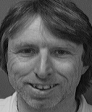

./ATnT/s39/7.pgm
[[ 93  93  88 ...  84  81  82]
 [ 91  89  92 ...  82  82  82]
 [ 92  90  93 ...  83  83  77]
 ...
 [205 202 202 ... 110 106 109]
 [205 204 203 ... 108 111 109]
 [203 205 204 ... 112 111 111]]
(112, 92)


./ATnT/s39/1.pgm
[[ 83  86  84 ...  74  72  75]
 [ 84  84  84 ...  75  74  75]
 [ 83  85  82 ...  73  76  74]
 ...
 [194 193 193 ... 137 134 133]
 [193 195 192 ... 135 135 134]
 [194 194 194 ... 136 138 134]]
(112, 92)


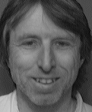

./ATnT/s39/6.pgm
[[ 97  94  92 ...  85  84  80]
 [ 89  92  94 ...  82  83  85]
 [ 90  93  92 ...  79  85  82]
 ...
 [187 194 198 ... 138 142 134]
 [197 200 201 ... 138 146 132]
 [199 199 199 ... 144 143 129]]
(112, 92)


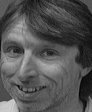

./ATnT/s39/10.pgm
[[ 89  87  92 ...  82  80  82]
 [ 87  87  90 ...  80  83  77]
 [ 87  90  89 ...  79  84  81]
 ...
 [194 196 191 ...  52 108 107]
 [197 196 184 ...  81 111 107]
 [197 191 184 ...  93 112 109]]
(112, 92)


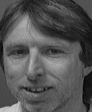

./ATnT/s39/8.pgm
[[ 88  85  89 ...  89  87  84]
 [ 87  88  84 ...  86  89  87]
 [ 85  88  88 ...  85  90  83]
 ...
 [199 201 201 ... 116 120 114]
 [199 200 202 ... 118 119 117]
 [192 195 203 ... 117 117 116]]
(112, 92)


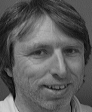

./ATnT/s4/3.pgm
[[112 115 120 ... 109 114 105]
 [118 112 115 ... 109 111 109]
 [116 116 115 ... 109 111 112]
 ...
 [ 96  98 100 ...  52  53  43]
 [ 97  96 104 ...  54  50  54]
 [107 110 109 ...  53  53  54]]
(112, 92)


./ATnT/s4/4.pgm
[[119 121 119 ... 118 118 119]
 [118 120 121 ... 119 119 120]
 [120 120 124 ... 116 116 116]
 ...
 [ 84  86  83 ...  80  79  87]
 [ 87  82  89 ...  78  85  76]
 [ 85  88 105 ...  82  78  80]]
(112, 92)


./ATnT/s4/9.pgm
[[114 118 114 ... 109 112 112]
 [113 115 117 ... 113 108 114]
 [118 111 118 ... 113 111 108]
 ...
 [103  93 110 ...  51  55  52]
 [ 98 101  98 ...  49  54  55]
 [ 96 101  98 ...  54  55  52]]
(112, 92)


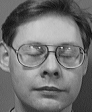

./ATnT/s4/2.pgm
[[116 112 115 ... 107 109 113]
 [116 117 114 ... 112 106 114]
 [117 113 118 ... 112 111 111]
 ...
 [ 98 101  97 ...  49  56  49]
 [100  99  98 ...  57  53  52]
 [102 100 110 ...  51  55  54]]
(112, 92)


./ATnT/s4/5.pgm
[[119 121 122 ... 117 114 121]
 [120 122 122 ... 117 117 117]
 [122 122 121 ... 116 113 116]
 ...
 [ 89  85  96 ...  79  80  84]
 [100 108 108 ...  79  82  84]
 [107 108 106 ...  79  80  82]]
(112, 92)


./ATnT/s4/7.pgm
[[119 121 123 ... 117 117 114]
 [119 120 123 ... 117 118 116]
 [122 121 117 ... 115 115 118]
 ...
 [ 82  86  89 ...  80  79  77]
 [ 90 100  98 ...  78  82  82]
 [104 103 104 ...  75  79  78]]
(112, 92)


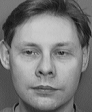

./ATnT/s4/1.pgm
[[115 113 113 ... 111 110 110]
 [114 117 114 ... 108 112 109]
 [116 116 117 ... 106 113 112]
 ...
 [ 99  96 101 ...  52  58  49]
 [ 93 101  94 ...  52  51  57]
 [ 99  93 101 ...  56  52  55]]
(112, 92)


./ATnT/s4/6.pgm
[[121 123 121 ... 113 118 118]
 [120 123 123 ... 115 116 116]
 [116 121 120 ... 118 112 115]
 ...
 [ 76  68  75 ...  82  78  81]
 [ 77  77  91 ...  81  78  86]
 [ 85  97 105 ...  88  83  78]]
(112, 92)


./ATnT/s4/10.pgm
[[119 124 118 ... 114 115 122]
 [121 122 119 ... 113 115 115]
 [122 120 122 ... 112 117 114]
 ...
 [ 91  99 128 ...  77  80  77]
 [ 90  92 124 ...  79  78  79]
 [ 86  92 121 ...  75  77  82]]
(112, 92)


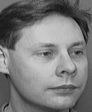

./ATnT/s4/8.pgm
[[118 114 117 ... 112 112 105]
 [115 114 114 ... 109 112 104]
 [117 115 114 ... 110 110 112]
 ...
 [ 97  97  95 ...  55  53  50]
 [101  97  98 ...  60  49  54]
 [ 96  91  98 ...  58  54  52]]
(112, 92)


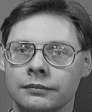

./ATnT/s11/3.pgm
[[52 48 47 ... 40 40 41]
 [51 45 54 ... 44 39 48]
 [52 48 48 ... 42 43 38]
 ...
 [62 60 57 ... 29 31 30]
 [60 56 56 ... 32 28 35]
 [59 71 61 ... 32 31 37]]
(112, 92)


./ATnT/s11/4.pgm
[[48 45 45 ... 41 40 39]
 [52 46 46 ... 39 43 38]
 [49 46 47 ... 45 38 46]
 ...
 [59 45 57 ... 30 30 35]
 [53 52 53 ... 28 30 37]
 [45 49 52 ... 28 37 29]]
(112, 92)


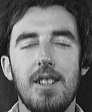

./ATnT/s11/9.pgm
[[ 50  46  49 ...  43  41  36]
 [ 46  48  52 ...  38  44  43]
 [ 48  49  53 ...  37  45  38]
 ...
 [ 62 170 224 ...  38  34  37]
 [211 214 222 ...  31  33  32]
 [210 210 218 ...  33  33  41]]
(112, 92)


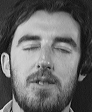

./ATnT/s11/2.pgm
[[44 48 45 ... 39 40 40]
 [47 49 46 ... 40 42 38]
 [44 47 51 ... 39 42 41]
 ...
 [51 58 52 ... 36 30 39]
 [54 49 56 ... 32 34 37]
 [62 46 49 ... 33 36 37]]
(112, 92)


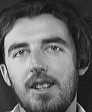

./ATnT/s11/5.pgm
[[51 48 43 ... 43 42 38]
 [44 48 46 ... 43 42 36]
 [51 45 50 ... 40 38 43]
 ...
 [60 48 56 ... 26 28 35]
 [52 50 55 ... 31 26 32]
 [47 50 47 ... 29 28 32]]
(112, 92)


./ATnT/s11/7.pgm
[[ 47  47  47 ...  40  38  39]
 [ 50  45  47 ...  38  39  36]
 [ 46  49  47 ...  40  39  36]
 ...
 [ 54  51  30 ...  33  34  30]
 [ 37  65 170 ...  35  33  27]
 [104 212 213 ...  30  35  33]]
(112, 92)


./ATnT/s11/1.pgm
[[ 48  46  49 ...  37  39  40]
 [ 43  53  46 ...  36  40  41]
 [ 52  43  53 ...  40  39  41]
 ...
 [ 62  48  49 ...  30  33  32]
 [ 56  25  92 ...  32  31  30]
 [ 43 110 215 ...  31  31  36]]
(112, 92)


./ATnT/s11/6.pgm
[[45 49 47 ... 40 39 42]
 [46 51 50 ... 41 39 37]
 [48 48 51 ... 41 38 38]
 ...
 [53 62 59 ... 36 33 36]
 [56 56 54 ... 37 39 36]
 [67 84 88 ... 40 30 44]]
(112, 92)


./ATnT/s11/10.pgm
[[ 48  44  49 ...  40  39  37]
 [ 49  45  47 ...  39  40  37]
 [ 45  42  51 ...  36  40  34]
 ...
 [ 42 131 213 ...  43  37  39]
 [194 212 222 ...  37  40  42]
 [211 209 224 ...  38  35  44]]
(112, 92)


./ATnT/s11/8.pgm
[[ 47  49  46 ...  39  39  39]
 [ 45  45  51 ...  38  37  41]
 [ 47  45  48 ...  42  33  46]
 ...
 [109 226 192 ...  29  34  31]
 [220 220 145 ...  28  29  35]
 [212 215 137 ...  31  32  34]]
(112, 92)


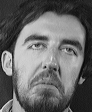

./ATnT/s33/3.pgm
[[ 93  92  97 ... 102 100  98]
 [ 92  95  90 ... 100  99  99]
 [ 90  95  98 ...  96 101 102]
 ...
 [187 198 196 ... 105 102  92]
 [193 202 197 ... 107 117 117]
 [197 203 196 ...  94  90  94]]
(112, 92)


./ATnT/s33/4.pgm
[[ 93  92  98 ... 101  99 102]
 [ 96  94  92 ... 102  99 102]
 [ 93  92  94 ...  99 101 100]
 ...
 [205 169 187 ...  84  56  61]
 [205 186 170 ... 118 111 113]
 [203 196 179 ... 118 119 130]]
(112, 92)


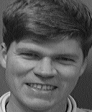

./ATnT/s33/9.pgm
[[ 54  49  56 ... 103 102 104]
 [ 54  47  49 ... 102 105 102]
 [ 42  43  67 ... 100 102 104]
 ...
 [168 174 157 ... 151 124  82]
 [161 166 172 ... 161 168 161]
 [175 189 175 ... 154 154 162]]
(112, 92)


./ATnT/s33/2.pgm
[[ 97  96  98 ... 103 103 102]
 [ 95  94  94 ... 101  98 101]
 [ 94  95  91 ... 101  96 100]
 ...
 [207 171 182 ... 116 108  88]
 [206 188 170 ... 109 119 124]
 [204 202 171 ...  75 104 124]]
(112, 92)


./ATnT/s33/5.pgm
[[101  86  71 ... 101 101 102]
 [ 92  73  69 ... 100 102 103]
 [ 85  69  77 ... 101 103 103]
 ...
 [ 78  85 161 ...  76  72  79]
 [144 155 180 ...  72  77  75]
 [171 167 186 ...  81 105  87]]
(112, 92)


./ATnT/s33/7.pgm
[[ 98  94 100 ... 102  98 102]
 [ 94  97  99 ...  98 102 104]
 [ 94  97  97 ... 100 103 100]
 ...
 [135 168 160 ... 105 122 127]
 [166 175 173 ... 165 151 153]
 [183 173 190 ... 164 167 164]]
(112, 92)


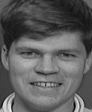

./ATnT/s33/1.pgm
[[ 88  79  77 ... 100 102 103]
 [ 80  69  86 ... 102 100 100]
 [ 64  71  86 ...  99 104 101]
 ...
 [192 191 200 ... 144 140 133]
 [194 199 200 ... 137 143 145]
 [189 202 200 ... 137 138 148]]
(112, 92)


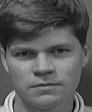

./ATnT/s33/6.pgm
[[ 40  42  53 ... 104 102 102]
 [ 50  65  61 ... 104 104 103]
 [ 64  62  67 ... 104 104 102]
 ...
 [168 179 176 ... 169 189 193]
 [193 173 180 ... 185 193 190]
 [188 157 188 ... 190 195 182]]
(112, 92)


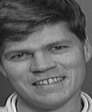

./ATnT/s33/10.pgm
[[ 91  96  89 ... 102 102  99]
 [ 95  94  93 ... 102  97 102]
 [ 94  96  96 ...  99 100 101]
 ...
 [201 182 175 ... 108 111 126]
 [203 198 174 ...  79  81 123]
 [204 199 190 ... 106  50 118]]
(112, 92)


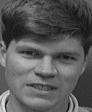

./ATnT/s33/8.pgm
[[104 100 101 ...  54  61  46]
 [103 103 102 ...  49  64  54]
 [102 102 102 ...  48  63  58]
 ...
 [135 132 132 ...  77  76  75]
 [144 134 131 ...  75  78  72]
 [140 134 132 ...  89  79  77]]
(112, 92)


./ATnT/s21/3.pgm
[[ 95  95  99 ...  89  92  91]
 [ 98  96  95 ...  93  89  94]
 [ 98  97  95 ...  90  89  92]
 ...
 [ 74  72  71 ... 127 139 156]
 [ 74  78  87 ... 126 158 149]
 [ 79 118 145 ... 111 165 162]]
(112, 92)


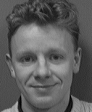

./ATnT/s21/4.pgm
[[103 102 104 ... 103 100 101]
 [105 104 106 ... 101 102 105]
 [105 101 104 ... 101 100 104]
 ...
 [157 175 177 ... 134 152 167]
 [156 177 184 ... 137 154 173]
 [149 181 187 ... 139 152 178]]
(112, 92)


./ATnT/s21/9.pgm
[[108 105 105 ... 105 104 103]
 [107 104 107 ... 104 103 102]
 [109 105 106 ... 104 102 100]
 ...
 [182 183 176 ... 163 143 168]
 [176 182 163 ... 166 147 164]
 [179 183 156 ... 169 147 165]]
(112, 92)


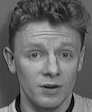

./ATnT/s21/2.pgm
[[ 99  90  97 ...  88  94  88]
 [ 99  94  96 ...  94  87  89]
 [ 95  97  97 ...  89  89  91]
 ...
 [ 84  97  97 ... 115 130 150]
 [122 154 153 ... 123 117 156]
 [165 176 164 ... 135 113 158]]
(112, 92)


./ATnT/s21/5.pgm
[[103 104 103 ... 102  99 100]
 [104 104 104 ...  98 103 105]
 [107 104 105 ... 103 104 101]
 ...
 [128 158 171 ... 133 164 143]
 [160 165 178 ... 131 165 147]
 [155 176 177 ... 132 165 149]]
(112, 92)


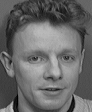

./ATnT/s21/7.pgm
[[104 106 105 ... 101 104 102]
 [101 107 102 ... 103 102 103]
 [106 104 106 ... 101 102 103]
 ...
 [ 63  64  63 ... 165 156 155]
 [ 85 110 126 ... 161 159 160]
 [149 167 165 ... 148 155 168]]
(112, 92)


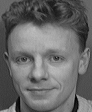

./ATnT/s21/1.pgm
[[ 93  98  95 ...  87  92  89]
 [ 96  95  97 ...  89  88  90]
 [ 99  98  94 ...  87  90  88]
 ...
 [ 83  81  91 ... 122 120 133]
 [121 132 155 ... 126 126 142]
 [168 163 177 ... 131 131 132]]
(112, 92)


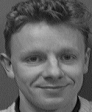

./ATnT/s21/6.pgm
[[107 103 104 ...  99 103  99]
 [103 107 101 ...  99 101 102]
 [105 105 102 ... 102 103 103]
 ...
 [168 176 183 ... 158 129 158]
 [174 170 175 ... 156 130 163]
 [176 166 183 ... 155 133 159]]
(112, 92)


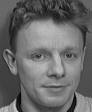

./ATnT/s21/10.pgm
[[105 104 102 ... 100 102 100]
 [104 102 105 ... 101 103 101]
 [101 106 102 ... 101 102 102]
 ...
 [162 161 172 ... 167 152 142]
 [159 169 164 ... 171 155 138]
 [157 177 166 ... 173 161 122]]
(112, 92)


./ATnT/s21/8.pgm
[[104 108 105 ... 104 105 108]
 [104 106 105 ... 105 106 103]
 [105 105 108 ... 102 103 106]
 ...
 [ 83  83  99 ... 163 176 141]
 [103 124 147 ... 179 164 148]
 [160 180 156 ... 173 175 155]]
(112, 92)


./ATnT/s2/3.pgm
[[30 37 35 ... 36 32 32]
 [31 38 30 ... 37 34 37]
 [36 37 30 ... 33 33 38]
 ...
 [42 37 39 ... 24 30 28]
 [40 35 36 ... 25 25 29]
 [36 39 34 ... 26 27 32]]
(112, 92)


./ATnT/s2/4.pgm
[[34 36 35 ... 32 31 31]
 [36 34 38 ... 27 32 30]
 [37 37 36 ... 29 38 27]
 ...
 [42 39 39 ... 27 25 26]
 [39 41 38 ... 26 27 26]
 [38 41 34 ... 32 25 25]]
(112, 92)


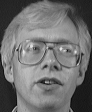

./ATnT/s2/9.pgm
[[ 43  39  36 ...  37  27  36]
 [ 38  39  40 ...  32  32  33]
 [ 39  34  40 ...  30  36  33]
 ...
 [ 22  96 164 ...  29  26  28]
 [ 19 186 182 ...  38  38  31]
 [112 183 208 ... 154 155 141]]
(112, 92)


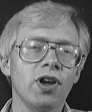

./ATnT/s2/2.pgm
[[37 35 35 ... 34 34 36]
 [36 36 37 ... 35 31 36]
 [38 36 37 ... 35 32 33]
 ...
 [42 43 39 ... 24 29 26]
 [34 44 43 ... 26 29 27]
 [36 43 36 ... 26 28 28]]
(112, 92)


./ATnT/s2/5.pgm
[[35 32 36 ... 36 31 35]
 [38 30 35 ... 34 33 34]
 [38 34 35 ... 30 33 33]
 ...
 [35 37 41 ... 26 25 26]
 [40 38 42 ... 26 27 27]
 [42 40 40 ... 25 28 29]]
(112, 92)


./ATnT/s2/7.pgm
[[ 38  35  36 ...  34  32  36]
 [ 35  39  39 ...  37  33  43]
 [ 40  34  40 ...  35  38  35]
 ...
 [ 39  41  35 ... 138 132 129]
 [ 40  36  40 ... 132 128 135]
 [ 37  42  39 ... 138 142 141]]
(112, 92)


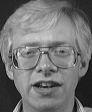

./ATnT/s2/1.pgm
[[ 35  36  37 ...  36  33  37]
 [ 35  35  39 ...  39  33  36]
 [ 36  36  37 ...  39  36  32]
 ...
 [ 39  38  41 ...  29  28  29]
 [ 34  36  39 ...  52  49  35]
 [ 36  36  40 ... 144 147 143]]
(112, 92)


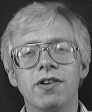

./ATnT/s2/6.pgm
[[34 35 35 ... 27 36 33]
 [36 35 37 ... 36 30 31]
 [37 35 38 ... 32 35 31]
 ...
 [40 37 39 ... 29 27 28]
 [37 38 44 ... 26 28 25]
 [40 38 43 ... 31 24 24]]
(112, 92)


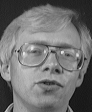

./ATnT/s2/10.pgm
[[ 37  34  38 ...  32  35  33]
 [ 31  39  37 ...  36  36  34]
 [ 34  36  37 ...  34  38  32]
 ...
 [ 36  41  38 ...  26  30  27]
 [ 47  41  36 ...  95  80  67]
 [ 39  37  41 ... 135 143 133]]
(112, 92)


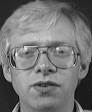

./ATnT/s2/8.pgm
[[ 34  39  35 ...  36  35  35]
 [ 35  35  36 ...  34  35  35]
 [ 35  42  34 ...  34  37  36]
 ...
 [ 38  36  39 ...  58  43  34]
 [ 41  34  43 ... 129 129 121]
 [ 39  36  35 ... 135 138 148]]
(112, 92)


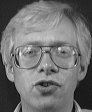

./ATnT/s19/3.pgm
[[50 49 49 ... 42 37 41]
 [54 50 47 ... 44 40 39]
 [60 44 54 ... 43 40 41]
 ...
 [69 67 61 ... 42 40 43]
 [81 50 44 ... 41 39 46]
 [81 33 15 ... 41 40 45]]
(112, 92)


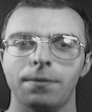

./ATnT/s19/4.pgm
[[54 52 49 ... 44 39 36]
 [53 55 47 ... 40 40 37]
 [50 53 54 ... 40 40 35]
 ...
 [43 42 40 ... 37 28 37]
 [38 40 39 ... 34 35 31]
 [42 37 36 ... 33 33 32]]
(112, 92)


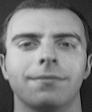

./ATnT/s19/9.pgm
[[46 48 51 ... 37 36 31]
 [53 47 51 ... 37 32 35]
 [54 51 50 ... 36 37 34]
 ...
 [42 41 43 ... 32 35 31]
 [46 36 45 ... 29 35 32]
 [41 43 37 ... 34 30 32]]
(112, 92)


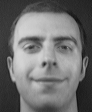

./ATnT/s19/2.pgm
[[51 41 56 ... 41 33 48]
 [52 50 47 ... 36 38 39]
 [48 49 51 ... 37 41 33]
 ...
 [43 41 49 ... 38 46 47]
 [73 61 65 ... 43 43 44]
 [85 48 49 ... 43 49 36]]
(112, 92)


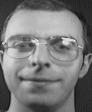

./ATnT/s19/5.pgm
[[52 51 52 ... 40 40 37]
 [49 52 53 ... 40 34 43]
 [46 58 49 ... 37 41 39]
 ...
 [37 41 38 ... 36 31 31]
 [35 39 37 ... 34 32 31]
 [41 35 39 ... 33 34 32]]
(112, 92)


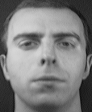

./ATnT/s19/7.pgm
[[55 52 54 ... 39 36 37]
 [54 53 48 ... 37 38 41]
 [54 53 48 ... 36 39 38]
 ...
 [41 38 36 ... 31 34 31]
 [38 35 41 ... 35 37 30]
 [40 35 38 ... 34 35 32]]
(112, 92)


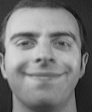

./ATnT/s19/1.pgm
[[ 42  47  48 ...  38  40  35]
 [ 45  40  45 ...  36  36  38]
 [ 46  53  48 ...  42  36  38]
 ...
 [ 59  50  46 ...  40  41  41]
 [112  82  66 ...  35  47  37]
 [124  97  57 ...  34  43  45]]
(112, 92)


./ATnT/s19/6.pgm
[[ 48  44  49 ...  38  38  34]
 [ 50  47  51 ...  42  38  35]
 [ 46  50  54 ...  40  39  39]
 ...
 [131 130 112 ...  38  41  40]
 [130 133 113 ...  37  41  37]
 [136 135 126 ...  41  45  35]]
(112, 92)


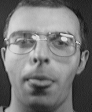

./ATnT/s19/10.pgm
[[ 42  47  46 ...  39  40  33]
 [ 44  47  45 ...  41  34  38]
 [ 46  49  46 ...  36  38  36]
 ...
 [ 63  68  53 ...  41  40  31]
 [113 108  68 ...  48  35  38]
 [128 118  68 ...  37  42  41]]
(112, 92)


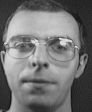

./ATnT/s19/8.pgm
[[53 50 52 ... 39 37 42]
 [52 53 52 ... 42 33 41]
 [54 57 53 ... 40 39 44]
 ...
 [42 40 42 ... 36 28 35]
 [40 40 39 ... 32 37 33]
 [40 35 41 ... 35 34 33]]
(112, 92)


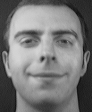

./ATnT/s32/3.pgm
[[38 33 43 ... 40 42 37]
 [38 34 46 ... 36 37 42]
 [42 35 40 ... 44 41 38]
 ...
 [39 39 32 ... 26 27 28]
 [73 67 73 ... 21 29 26]
 [69 30 60 ... 26 28 23]]
(112, 92)


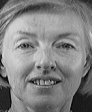

./ATnT/s32/4.pgm
[[40 37 35 ... 31 46 35]
 [40 36 43 ... 43 40 30]
 [46 34 36 ... 40 34 32]
 ...
 [36 32 38 ... 40 33 31]
 [29 36 35 ... 32 29 23]
 [29 40 28 ... 27 30 24]]
(112, 92)


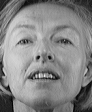

./ATnT/s32/9.pgm
[[33 39 38 ... 32 33 33]
 [38 33 37 ... 33 33 33]
 [36 37 37 ... 32 36 31]
 ...
 [37 34 35 ... 25 29 30]
 [34 32 35 ... 28 31 26]
 [34 34 34 ... 26 27 27]]
(112, 92)


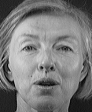

./ATnT/s32/2.pgm
[[39 37 37 ... 55 37 36]
 [39 40 34 ... 53 42 35]
 [32 41 34 ... 56 44 38]
 ...
 [34 36 35 ... 27 25 30]
 [38 33 36 ... 27 24 30]
 [38 36 36 ... 24 30 28]]
(112, 92)


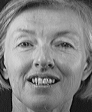

./ATnT/s32/5.pgm
[[37 37 42 ... 31 35 36]
 [35 38 42 ... 31 37 35]
 [39 37 37 ... 31 38 33]
 ...
 [32 32 36 ... 26 32 31]
 [30 38 37 ... 24 32 27]
 [32 36 35 ... 29 28 27]]
(112, 92)


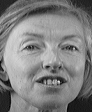

./ATnT/s32/7.pgm
[[41 34 40 ... 34 31 34]
 [35 44 38 ... 32 34 34]
 [36 40 39 ... 34 34 33]
 ...
 [39 34 38 ... 38 39 38]
 [38 37 32 ... 39 39 35]
 [39 35 34 ... 38 39 37]]
(112, 92)


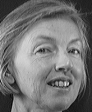

./ATnT/s32/1.pgm
[[40 42 38 ... 44 43 34]
 [38 37 40 ... 40 37 39]
 [39 36 40 ... 55 43 40]
 ...
 [40 39 35 ... 29 26 32]
 [40 37 36 ... 29 30 27]
 [38 37 40 ... 28 33 29]]
(112, 92)


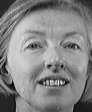

./ATnT/s32/6.pgm
[[40 35 37 ... 34 31 32]
 [46 33 38 ... 29 36 32]
 [36 37 39 ... 30 33 35]
 ...
 [35 36 36 ... 30 29 29]
 [27 37 34 ... 33 30 31]
 [35 35 37 ... 33 31 29]]
(112, 92)


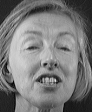

./ATnT/s32/10.pgm
[[32 37 32 ... 30 35 31]
 [33 36 34 ... 33 33 33]
 [33 34 36 ... 31 34 31]
 ...
 [34 30 35 ... 30 26 27]
 [37 32 34 ... 25 27 28]
 [31 33 34 ... 27 25 27]]
(112, 92)


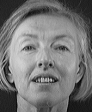

./ATnT/s32/8.pgm
[[34 38 38 ... 37 36 34]
 [34 38 41 ... 35 35 38]
 [34 39 39 ... 31 34 42]
 ...
 [39 34 32 ... 28 27 25]
 [37 33 33 ... 28 24 26]
 [35 35 34 ... 28 28 22]]
(112, 92)


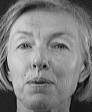

./ATnT/s24/3.pgm
[[34 38 36 ... 46 45 46]
 [33 37 38 ... 46 46 47]
 [34 37 42 ... 46 48 48]
 ...
 [36 36 37 ... 56 57 53]
 [38 39 36 ... 57 63 55]
 [34 35 33 ... 55 58 55]]
(112, 92)


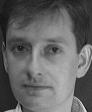

./ATnT/s24/4.pgm
[[35 35 35 ... 47 45 47]
 [36 34 39 ... 51 45 46]
 [35 36 35 ... 48 48 48]
 ...
 [37 39 37 ... 58 58 57]
 [34 40 35 ... 54 60 54]
 [35 36 39 ... 56 58 55]]
(112, 92)


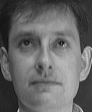

./ATnT/s24/9.pgm
[[35 36 37 ... 46 46 46]
 [37 36 38 ... 48 50 47]
 [38 36 38 ... 47 48 50]
 ...
 [39 40 43 ... 61 58 62]
 [42 39 40 ... 56 57 54]
 [39 37 41 ... 59 57 58]]
(112, 92)


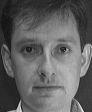

./ATnT/s24/2.pgm
[[37 36 38 ... 45 42 45]
 [36 38 38 ... 43 46 45]
 [36 39 40 ... 50 48 50]
 ...
 [45 43 41 ... 51 46 55]
 [43 44 42 ... 49 48 50]
 [37 40 40 ... 40 50 50]]
(112, 92)


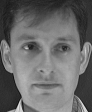

./ATnT/s24/5.pgm
[[40 41 43 ... 43 42 41]
 [44 47 49 ... 46 40 42]
 [44 45 44 ... 39 41 42]
 ...
 [43 49 48 ... 38 37 36]
 [48 47 49 ... 40 39 38]
 [48 51 45 ... 40 37 36]]
(112, 92)


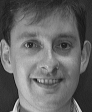

./ATnT/s24/7.pgm
[[36 38 37 ... 45 46 45]
 [36 41 40 ... 46 46 47]
 [37 40 41 ... 43 47 44]
 ...
 [41 47 41 ... 51 53 50]
 [45 40 46 ... 52 53 47]
 [43 42 42 ... 48 51 50]]
(112, 92)


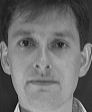

./ATnT/s24/1.pgm
[[36 39 45 ... 47 44 43]
 [37 45 40 ... 47 44 47]
 [36 40 41 ... 47 47 45]
 ...
 [48 45 46 ... 51 47 54]
 [44 44 47 ... 52 51 52]
 [42 45 41 ... 52 51 53]]
(112, 92)


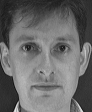

./ATnT/s24/6.pgm
[[ 35  40  38 ...  46  45  46]
 [ 39  40  38 ...  47  46  46]
 [ 39  39  38 ...  47  48  44]
 ...
 [ 46  86 131 ...  37  39  46]
 [138 154 161 ... 130  27  43]
 [169 174 176 ... 222  55  34]]
(112, 92)


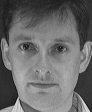

./ATnT/s24/10.pgm
[[ 34  38  40 ...  46  47  45]
 [ 38  40  52 ...  45  45  45]
 [ 38  44  41 ...  45  46  48]
 ...
 [ 38  41  31 ...  65  56  60]
 [ 36  43  86 ...  59  59  55]
 [ 89 137 162 ...  60  57  59]]
(112, 92)


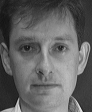

./ATnT/s24/8.pgm
[[ 40  42  41 ...  48  44  46]
 [ 41  42  42 ...  46  45  47]
 [ 42  40  40 ...  48  51  46]
 ...
 [154 160 161 ...  38  45  50]
 [172 174 180 ...  29  40  45]
 [171 170 168 ...  57  37  42]]
(112, 92)


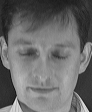

./ATnT/s37/3.pgm
[[118 120 118 ... 122 121 119]
 [121 120 121 ... 121 121 122]
 [121 119 121 ... 122 122 120]
 ...
 [ 63  68  65 ...  95  98  99]
 [ 67  65  67 ...  98  98 100]
 [ 66  67  66 ... 131 113 102]]
(112, 92)


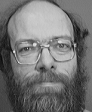

./ATnT/s37/4.pgm
[[58 48 47 ... 46 53 42]
 [56 54 50 ... 47 48 45]
 [50 50 53 ... 47 50 47]
 ...
 [61 59 82 ... 51 39 36]
 [65 63 70 ... 34 43 38]
 [76 77 81 ... 31 43 41]]
(112, 92)


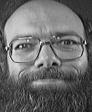

./ATnT/s37/9.pgm
[[121 121 122 ... 121 120 120]
 [121 120 118 ... 123 120 122]
 [119 122 121 ... 121 120 121]
 ...
 [ 64  71  69 ...  97 104 101]
 [ 70  71  66 ...  99  97 102]
 [ 65  69  72 ...  96  98 100]]
(112, 92)


./ATnT/s37/2.pgm
[[52 47 51 ... 45 48 45]
 [52 50 53 ... 46 46 47]
 [55 44 58 ... 45 48 44]
 ...
 [67 68 73 ... 44 35 46]
 [72 62 68 ... 35 39 49]
 [73 68 63 ... 30 34 42]]
(112, 92)


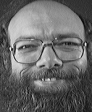

./ATnT/s37/5.pgm
[[55 47 50 ... 47 44 49]
 [47 52 47 ... 45 46 46]
 [49 53 48 ... 42 48 46]
 ...
 [71 67 72 ... 46 59 45]
 [68 71 65 ... 49 49 67]
 [64 71 62 ... 48 46 72]]
(112, 92)


./ATnT/s37/7.pgm
[[121 122 121 ... 121 120 119]
 [122 121 125 ... 120 118 120]
 [122 124 122 ... 122 121 121]
 ...
 [142 139 148 ... 147 154 145]
 [137 139 159 ... 142 148 149]
 [140 157 162 ... 141 140 145]]
(112, 92)


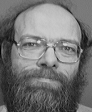

./ATnT/s37/1.pgm
[[121 119 122 ... 120 122 121]
 [122 121 122 ... 121 120 122]
 [122 121 120 ... 119 121 121]
 ...
 [ 72  67  70 ...  99  97  98]
 [ 67  69  71 ... 109  98  98]
 [ 65  73  67 ... 150 135 121]]
(112, 92)


./ATnT/s37/6.pgm
[[47 50 52 ... 48 45 48]
 [49 52 51 ... 45 46 42]
 [51 50 48 ... 44 46 47]
 ...
 [70 63 68 ... 44 39 45]
 [69 62 68 ... 37 42 37]
 [69 66 62 ... 33 45 36]]
(112, 92)


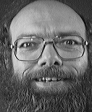

./ATnT/s37/10.pgm
[[116 123 120 ... 123 121 124]
 [119 121 123 ... 119 123 123]
 [118 123 121 ... 121 122 119]
 ...
 [ 69  67  70 ... 100  97  96]
 [ 69  69  68 ...  96  96  98]
 [ 69  65  72 ... 108  96  98]]
(112, 92)


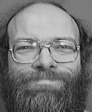

./ATnT/s37/8.pgm
[[45 54 48 ... 42 50 37]
 [50 53 49 ... 49 48 44]
 [52 50 48 ... 47 43 47]
 ...
 [67 67 67 ... 40 42 32]
 [60 65 68 ... 50 55 39]
 [65 63 76 ... 46 67 33]]
(112, 92)


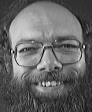

./ATnT/s3/3.pgm
[[101 106 102 ... 108 107 108]
 [101 104 102 ... 106 108 105]
 [ 99 104 102 ... 108 106 111]
 ...
 [ 64  69  75 ...  42  48  48]
 [ 74  81  85 ...  46  48  44]
 [ 77  83  84 ...  46  50  45]]
(112, 92)


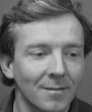

./ATnT/s3/4.pgm
[[105 102 108 ... 105 106 105]
 [101 103  99 ... 106 108 104]
 [106 101 107 ... 103 110 107]
 ...
 [ 79  74  70 ...  43  36  43]
 [ 73  69  73 ...  37  38  41]
 [ 68  73  71 ...  42  35  37]]
(112, 92)


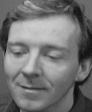

./ATnT/s3/9.pgm
[[104 109 104 ... 110 111 109]
 [104 108 106 ... 107 112 110]
 [106 103 106 ... 109 111 112]
 ...
 [ 73  77  78 ...  59  56  63]
 [ 72  84  82 ...  56  57  60]
 [ 78  77  77 ...  52  59  56]]
(112, 92)


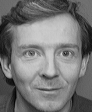

./ATnT/s3/2.pgm
[[100  99 108 ... 109 110 111]
 [104 100 105 ... 112 106 109]
 [100 102 100 ... 110 107 110]
 ...
 [ 78  84  80 ...  42  47  47]
 [ 74  83  74 ...  43  45  44]
 [ 79  78  76 ...  44  42  44]]
(112, 92)


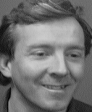

./ATnT/s3/5.pgm
[[101 104 104 ... 109 111 108]
 [101 101 104 ... 108 109 106]
 [102 103  99 ... 108 109 109]
 ...
 [ 68  71  72 ...  47  45  45]
 [ 72  78  74 ...  50  45  44]
 [ 71  66  72 ...  42  46  43]]
(112, 92)


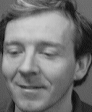

./ATnT/s3/7.pgm
[[109 111 108 ... 110 108 109]
 [111 106 110 ... 107 107 109]
 [111 108 111 ... 110 109 111]
 ...
 [ 72  70  79 ...  59  60  51]
 [ 73  70  79 ...  57  56  52]
 [ 71  71  84 ...  52  55  48]]
(112, 92)


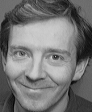

./ATnT/s3/1.pgm
[[103 105 104 ... 111 107 106]
 [102 106 107 ... 110 106 106]
 [103 106 104 ... 111 108 107]
 ...
 [ 80  82  85 ...  44  47  43]
 [ 79  87  78 ...  48  41  44]
 [ 76  88  82 ...  44  38  43]]
(112, 92)


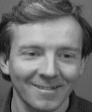

./ATnT/s3/6.pgm
[[110 106 109 ... 108 112 109]
 [109 107 110 ... 108 110 110]
 [108 107 110 ... 109 110 108]
 ...
 [ 68  71  61 ...  59  53  55]
 [ 72  68  60 ...  54  53  60]
 [ 68  65  60 ...  49  53  53]]
(112, 92)


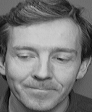

./ATnT/s3/10.pgm
[[104 109 103 ... 110 110 110]
 [102 106 105 ... 112 109 111]
 [107 107 104 ... 110 110 110]
 ...
 [ 79  81  77 ...  56  60  57]
 [ 75  79  73 ...  53  56  56]
 [ 79  76  78 ...  57  56  59]]
(112, 92)


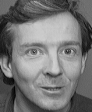

./ATnT/s3/8.pgm
[[107 104 109 ... 110 107 109]
 [107 106 107 ... 109 108 110]
 [108 107 107 ... 109 109 108]
 ...
 [ 71  73  72 ...  57  58  60]
 [ 72  75  76 ...  58  60  56]
 [ 74  78  75 ...  58  56  57]]
(112, 92)


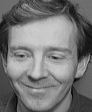

./ATnT/s8/3.pgm
[[117 114 116 ... 111 108 113]
 [112 116 112 ... 109 110 109]
 [116 113 114 ... 111 111 111]
 ...
 [ 65  65  56 ...  81  82  79]
 [ 67  68  65 ...  80  87  87]
 [ 67  68  73 ...  85  89  91]]
(112, 92)


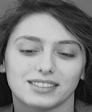

./ATnT/s8/4.pgm
[[128 125 125 ... 115 115 118]
 [125 127 124 ... 118 116 116]
 [128 126 125 ... 116 119 115]
 ...
 [ 47  42  37 ...  43  27  19]
 [ 48  44  35 ...  36  36  20]
 [ 47  43  41 ...  45  31  30]]
(112, 92)


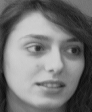

./ATnT/s8/9.pgm
[[116 116 117 ... 115 110 114]
 [116 114 116 ... 113 110 112]
 [116 112 117 ... 114 111 110]
 ...
 [ 23  22  28 ...  74  69  61]
 [ 27  29  29 ...  76  76  66]
 [ 28  27  38 ...  83  76  77]]
(112, 92)


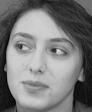

./ATnT/s8/2.pgm
[[131 128 126 ... 118 122 119]
 [127 127 127 ... 120 117 119]
 [126 125 128 ... 122 120 119]
 ...
 [ 57  55  51 ...  41  43  45]
 [ 62  57  51 ...  44  41  39]
 [ 57  58  55 ...  41  40  35]]
(112, 92)


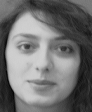

./ATnT/s8/5.pgm
[[114 115 115 ... 110 106 109]
 [114 114 112 ... 110 111 106]
 [115 112 112 ... 110 109 107]
 ...
 [ 54  57  59 ...  76  72  71]
 [ 62  68  66 ...  78  78  72]
 [ 68  74  76 ...  78  85  77]]
(112, 92)


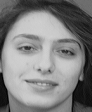

./ATnT/s8/7.pgm
[[129 127 128 ... 117 118 115]
 [130 125 129 ... 118 118 114]
 [124 128 124 ... 118 119 115]
 ...
 [ 39  40  40 ...  35  39  46]
 [ 42  39  41 ...  32  37  41]
 [ 45  42  42 ...  32  35  40]]
(112, 92)


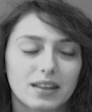

./ATnT/s8/1.pgm
[[126 130 131 ... 121 121 121]
 [128 127 132 ... 121 120 120]
 [129 127 131 ... 120 122 120]
 ...
 [ 47  46  48 ...  34  44  45]
 [ 48  46  44 ...  40  49  41]
 [ 52  46  48 ...  43  51  48]]
(112, 92)


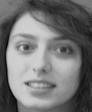

./ATnT/s8/6.pgm
[[117 112 115 ... 108 112 109]
 [114 115 116 ... 111 109 111]
 [115 114 114 ... 110 111 109]
 ...
 [ 46  53  59 ...  82  76  72]
 [ 55  59  67 ...  80  78  76]
 [ 57  61  69 ...  82  82  80]]
(112, 92)


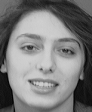

./ATnT/s8/10.pgm
[[117 115 115 ... 111 112 109]
 [114 115 114 ... 111 110 110]
 [117 111 115 ... 111 112 110]
 ...
 [ 63  65  65 ...  81  41  39]
 [ 66  64  67 ...  78  44  47]
 [ 72  66  70 ...  53  46  68]]
(112, 92)


./ATnT/s8/8.pgm
[[117 113 118 ... 111 107 113]
 [116 117 112 ... 111 111 113]
 [116 116 116 ... 112 109 111]
 ...
 [ 54  51  60 ...  76  78  75]
 [ 64  64  67 ...  76  79  82]
 [ 70  70  75 ...  78  85  82]]
(112, 92)


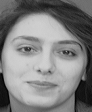

./ATnT/s10/3.pgm
[[137 135 136 ... 129 131 128]
 [137 135 133 ... 133 128 127]
 [137 134 136 ... 130 125 127]
 ...
 [ 26  27  28 ...  28  21  22]
 [ 23  25  25 ...  19  21  26]
 [ 24  28  24 ...  19  24  41]]
(112, 92)


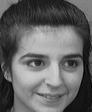

./ATnT/s10/4.pgm
[[132 118 124 ... 132 129 129]
 [130 122 110 ... 129 129 129]
 [115 120 108 ... 126 131 132]
 ...
 [ 21  27  31 ...  62  64  68]
 [ 27  32  36 ...  58  65  71]
 [ 32  38  39 ...  56  67  62]]
(112, 92)


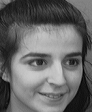

./ATnT/s10/9.pgm
[[136 136 136 ... 128 133 133]
 [137 137 138 ... 130 133 127]
 [134 140 137 ... 134 133 128]
 ...
 [ 59  60  55 ...  16  22  22]
 [ 65  61  48 ...  17  22  19]
 [ 60  48  56 ...  19  20  21]]
(112, 92)


./ATnT/s10/2.pgm
[[138 135 135 ... 128 129 126]
 [136 135 136 ... 130 128 126]
 [134 135 134 ... 132 128 128]
 ...
 [ 43  26  28 ...  14  22  22]
 [ 37  27  26 ...  16  23  25]
 [ 39  27  26 ...  23  18  35]]
(112, 92)


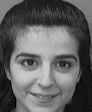

./ATnT/s10/5.pgm
[[133 135 137 ... 129 131 134]
 [136 134 134 ... 130 130 132]
 [136 135 134 ... 130 130 129]
 ...
 [ 18  18  24 ...  16  17  19]
 [ 25  21  23 ...  17  18  19]
 [ 22  26  24 ...  16  19  17]]
(112, 92)


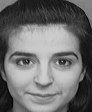

./ATnT/s10/7.pgm
[[134 138 136 ... 129 131 127]
 [134 135 135 ... 130 130 129]
 [133 134 135 ... 127 132 133]
 ...
 [ 25  19  21 ...  27  57  81]
 [ 26  22  19 ...  30  71  81]
 [ 21  25  22 ...  55  79  81]]
(112, 92)


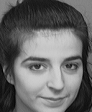

./ATnT/s10/1.pgm
[[140 134 135 ... 129 126 128]
 [140 136 135 ... 127 126 128]
 [142 132 137 ... 126 128 128]
 ...
 [ 63  48  47 ...  15  26  27]
 [ 42  45  48 ...  23  24  36]
 [ 43  55  43 ...  25  26  49]]
(112, 92)


./ATnT/s10/6.pgm
[[133 135 135 ... 133 131 132]
 [133 133 134 ... 131 129 130]
 [130 134 132 ... 129 131 129]
 ...
 [ 26  20  32 ...  19  22  16]
 [ 25  21  28 ...  18  18  16]
 [ 23  25  27 ...  18  17  15]]
(112, 92)


./ATnT/s10/10.pgm
[[133 129 133 ... 126 126 124]
 [129 132 131 ... 125 128 126]
 [132 129 131 ... 126 125 127]
 ...
 [ 30  31  20 ...  22  33  32]
 [ 30  26  23 ...  21  29  31]
 [ 23  30  21 ...  15  29  26]]
(112, 92)


./ATnT/s10/8.pgm
[[135 133 136 ... 129 131 129]
 [135 139 132 ... 131 133 129]
 [137 134 137 ... 131 131 130]
 ...
 [ 26  23  29 ...  14  21  17]
 [ 31  20  30 ...  17  20  17]
 [ 29  21  27 ...  18  21  24]]
(112, 92)


./ATnT/s1/3.pgm
[[39 44 53 ... 47 48 47]
 [44 44 61 ... 47 45 46]
 [59 39 57 ... 46 46 44]
 ...
 [49 46 42 ... 30 32 28]
 [46 35 34 ... 30 29 27]
 [32 37 27 ... 29 26 29]]
(112, 92)


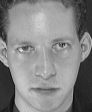

./ATnT/s1/4.pgm
[[63 53 35 ... 36 44 45]
 [56 48 31 ... 57 50 50]
 [52 29 35 ... 54 55 61]
 ...
 [35 37 36 ... 44  9 25]
 [36 35 37 ... 40  7 28]
 [35 38 34 ... 41 10 24]]
(112, 92)


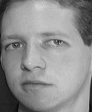

./ATnT/s1/9.pgm
[[42 41 44 ... 50 49 57]
 [41 41 43 ... 51 53 53]
 [54 40 43 ... 49 52 53]
 ...
 [38 37 36 ... 40 43 40]
 [38 36 37 ... 44 42 39]
 [37 39 37 ... 42 43 41]]
(112, 92)


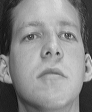

./ATnT/s1/2.pgm
[[ 60  60  62 ...  40  53  46]
 [ 58  73  54 ...  34  50  51]
 [ 68  77  80 ...  36  50  49]
 ...
 [ 24 143 160 ...  34  33  33]
 [ 18 136 161 ...  36  36  31]
 [  9 111 168 ...  32  34  34]]
(112, 92)


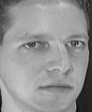

./ATnT/s1/5.pgm
[[64 76 80 ... 52 54 52]
 [60 61 60 ... 52 53 51]
 [63 80 79 ... 53 52 59]
 ...
 [21 22 12 ... 37 42 35]
 [19 20  7 ... 42 35 42]
 [24 14 11 ... 35 37 39]]
(112, 92)


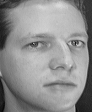

./ATnT/s1/7.pgm
[[41 47 47 ... 52 46 49]
 [44 43 43 ... 50 49 46]
 [48 47 46 ... 50 48 47]
 ...
 [43 44 44 ... 36 37 35]
 [45 44 45 ... 37 39 33]
 [46 41 47 ... 35 37 38]]
(112, 92)


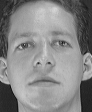

./ATnT/s1/1.pgm
[[48 49 45 ... 56 56 54]
 [45 52 39 ... 52 50 51]
 [45 50 42 ... 48 53 50]
 ...
 [50 48 50 ... 45 46 46]
 [45 54 49 ... 46 47 47]
 [51 51 51 ... 47 46 46]]
(112, 92)


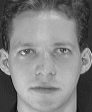

./ATnT/s1/6.pgm
[[ 43  50  41 ...  55  55  56]
 [ 45  53  44 ...  67  62  52]
 [ 57  47  47 ...  45  59  55]
 ...
 [ 49  49  46 ... 154 152 175]
 [ 46  48  47 ... 157 150 174]
 [ 49  50  43 ... 158 153 169]]
(112, 92)


./ATnT/s1/10.pgm
[[34 34 33 ...  1  1  1]
 [35 30 32 ... 38 47 39]
 [34 28 31 ... 55 59 49]
 ...
 [30 29 31 ... 35 37 41]
 [31 29 32 ... 42 34 39]
 [28 33 27 ... 37 40 33]]
(112, 92)


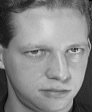

./ATnT/s1/8.pgm
[[44 43 32 ... 52 48 52]
 [44 38 33 ... 51 51 54]
 [41 42 29 ... 50 53 53]
 ...
 [39 37 39 ... 41 37 37]
 [41 41 38 ... 44 36 32]
 [40 36 42 ... 43 43 37]]
(112, 92)


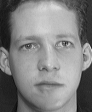

./ATnT/s35/3.pgm [[ 89  95  95 ... 152 144 134]
 [ 87  97  88 ... 155 145 140]
 [ 92  98  91 ... 144 151 142]
 ...
 [ 76  74  79 ... 143 139 148]
 [ 76  75  78 ... 137 146 151]
 [ 77  76  74 ... 147 152 159]]
./ATnT/s35/4.pgm [[ 84  96 101 ...  91  84  86]
 [ 94  93  93 ...  95  90  83]
 [ 94  96  87 ...  97  95  91]
 ...
 [193 196 202 ...  59  64  69]
 [190 195 199 ...  40  69  58]
 [191 191 197 ...  36  57  55]]
./ATnT/s35/9.pgm [[ 67  62  88 ... 158 141 151]
 [ 66  57  75 ... 156 149 140]
 [ 65  71  74 ... 150 155 142]
 ...
 [ 51  47  50 ... 176 166 147]
 [ 52  50  50 ... 170 161 140]
 [ 48  53  55 ... 167 157 145]]
./ATnT/s35/2.pgm [[ 86  89  90 ... 143 129 125]
 [ 83  90  89 ... 138 140 135]
 [ 89  89  88 ... 136 128 131]
 ...
 [201 206 209 ...  79  75  76]
 [201 206 207 ... 112  85  66]
 [201 205 208 ... 124 116  83]]
./ATnT/s35/5.pgm [[ 91  83  70 ... 162 161 157]
 [ 82  81  72 ... 148 165 162]
 [ 86  74  70 ... 138 164 168]
 ...
 [ 54  50  52 ... 156 181 193]
 [ 52  51  51 ... 

In [4]:
from google.colab.patches import cv2_imshow
from os import walk, path

def print_face_dictionary(att_faces_dict):
  for keys in att_faces_dict:
    print(keys, att_faces_dict[keys])

att_faces_dict = {}
for dir_path, dir_names, file_names in walk('./ATnT'):
  for file in file_names:
    image_filename = path.join(dir_path, file)
    print(image_filename)
    image_frame = cv2.imread(image_filename, 0)
    print(image_frame)
  
    if image_frame is not None:
      print(image_frame.shape)
      # cv2.imshow('image', frame)
      cv2_imshow(image_frame)
      # image_frame_col = np.array(image_frame, dtype='float64').flatten()
      # print(image_frame_col)
      att_faces_dict[image_filename] = image_frame
  
print_face_dictionary(att_faces_dict)


***Train Test Split***

In [5]:
X_train = [] # train_face_set
y_train = [] # train_face_labels
X_test = [] # test_face_set
y_test = [] # test_face_labels

for index in att_faces_dict:
    print(index)
    keys_list = index.split('/')
    print("keys_list",end="")
    print(keys_list)
    label_list = keys_list[3].split('.')
    print("label_list",end="")
    print(label_list)

    image_label = index
    if label_list[0] == "8": # keeping 8.pgm from each folder as test data
      X_test.append(att_faces_dict[index].flatten())
      y_test.append(image_label)
    else:
      X_train.append(att_faces_dict[index].flatten())
      y_train.append(image_label)


./ATnT/s35/3.pgm
keys_list['.', 'ATnT', 's35', '3.pgm']
label_list['3', 'pgm']
./ATnT/s35/4.pgm
keys_list['.', 'ATnT', 's35', '4.pgm']
label_list['4', 'pgm']
./ATnT/s35/9.pgm
keys_list['.', 'ATnT', 's35', '9.pgm']
label_list['9', 'pgm']
./ATnT/s35/2.pgm
keys_list['.', 'ATnT', 's35', '2.pgm']
label_list['2', 'pgm']
./ATnT/s35/5.pgm
keys_list['.', 'ATnT', 's35', '5.pgm']
label_list['5', 'pgm']
./ATnT/s35/7.pgm
keys_list['.', 'ATnT', 's35', '7.pgm']
label_list['7', 'pgm']
./ATnT/s35/1.pgm
keys_list['.', 'ATnT', 's35', '1.pgm']
label_list['1', 'pgm']
./ATnT/s35/6.pgm
keys_list['.', 'ATnT', 's35', '6.pgm']
label_list['6', 'pgm']
./ATnT/s35/10.pgm
keys_list['.', 'ATnT', 's35', '10.pgm']
label_list['10', 'pgm']
./ATnT/s35/8.pgm
keys_list['.', 'ATnT', 's35', '8.pgm']
label_list['8', 'pgm']
./ATnT/s15/3.pgm
keys_list['.', 'ATnT', 's15', '3.pgm']
label_list['3', 'pgm']
./ATnT/s15/4.pgm
keys_list['.', 'ATnT', 's15', '4.pgm']
label_list['4', 'pgm']
./ATnT/s15/9.pgm
keys_list['.', 'ATnT', 's15', '9

In [6]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[array([ 89,  95,  95, ..., 147, 152, 159], dtype=uint8), array([ 84,  96, 101, ...,  36,  57,  55], dtype=uint8), array([ 67,  62,  88, ..., 167, 157, 145], dtype=uint8), array([ 86,  89,  90, ..., 124, 116,  83], dtype=uint8), array([ 91,  83,  70, ..., 171, 188, 190], dtype=uint8), array([88, 97, 95, ..., 67, 68, 69], dtype=uint8), array([ 86,  90,  87, ..., 153, 142, 139], dtype=uint8), array([95, 89, 89, ..., 43, 55, 55], dtype=uint8), array([ 92,  86,  89, ..., 183, 175, 175], dtype=uint8), array([39, 40, 38, ..., 36, 38, 40], dtype=uint8), array([39, 41, 37, ..., 33, 33, 40], dtype=uint8), array([120, 119, 121, ...,  74,  74,  80], dtype=uint8), array([121, 120, 120, ...,  79,  76,  78], dtype=uint8), array([117, 122, 120, ...,  76,  78,  71], dtype=uint8), array([119, 123, 123, ...,  78,  72,  75], dtype=uint8), array([38, 35, 40, ..., 36, 35, 39], dtype=uint8), array([38, 41, 37, ..., 39, 38, 40], dtype=uint8), array([119, 121, 123, ...,  73,  74,  76], dtype=uint8), array([11

In [7]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [8]:
print(len(X_train))
print(X_train)
print()
print(len(X_test))
print(X_test)

360
[[ 89  95  95 ... 147 152 159]
 [ 84  96 101 ...  36  57  55]
 [ 67  62  88 ... 167 157 145]
 ...
 [ 48  49  45 ...  47  46  46]
 [ 43  50  41 ... 158 153 169]
 [ 34  34  33 ...  37  40  33]]

40
[[ 92  93  96 ... 192 163 157]
 [ 45  38  40 ... 135  24  36]
 [112 110 113 ... 157 159 167]
 ...
 [117 113 118 ...  78  85  82]
 [135 133 136 ...  18  21  24]
 [ 44  43  32 ...  43  43  37]]


#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

***We compute the eigenvectors using the covariance matrix constructed from the dataset and send the number of components to the procedure below in order to obtain the top components from the eigenvector that meet our requirements.***

In [9]:
"""
Implement pca in the following function by taking the following arguements:
1. X(images array)
2. number of components
The function must return the eigen vectors (principal components) also termed "Eigen faces"
"""
def principalComponentAnalysis(X, number_of_compoonents):

  return

In [10]:
class PCAFromScratch:
  def __init__(self, number_of_components=None, mean=None):
    self.components = None
    self.number_of_components = number_of_components
    self.mean = None
    self.eigenvectors = None
    self.eigenvalues = None
    self.eigenfaces = None

  def fit(self, X):
    # Mean centering
    self.mean = np.mean(X, axis=0)
    X = X - self.mean

    # covariance, function needs samples as columns
    cov = np.cov(X.T)

    # eigenvalues, eigenvectors
    self.eigenvalues, self.eigenvectors = np.linalg.eig(cov)

    # -> eigenvector v = [:,i] column vector, transpose for easier calculations
    # sort eigenvectors
    self.eigenvectors = self.eigenvectors.T
    idxs = np.argsort(self.eigenvalues)[::-1]
    self.eigenvalues = self.eigenvalues[idxs]
    self.eigenvectors = self.eigenvectors[idxs]

    # store first n self.eigenvectors
    self.components = self.eigenvectors[0 : self.number_of_components]

    self.eigenfaces = self.components

    return X, self.mean, self.eigenvalues, self.eigenvectors, self.eigenfaces
  
  def transform(self, X):
    # project data
    X = X - self.mean
    # return np.dot(X, self.components.T)
    weights = (self.eigenfaces @ X.T)
    return weights

  def getEigenFacesAndWeights(self, X, first_n_components):
    X = X - self.mean
    first_n_eigenfaces = self.eigenvectors[0 : first_n_components]
    first_n_eigenfaces_weights = (first_n_eigenfaces @ X.T)
    return first_n_eigenfaces, first_n_eigenfaces_weights



In [11]:
pca = PCAFromScratch(number_of_components=5) # taking 16 mins to run
X_mean, mean, eigenvalues, eigenvectos, eigenfaces = pca.fit(X_train)


In [12]:
print("X_mean: ", end="")
print(X_mean)
print("mean: ", end="")
print(mean)
print("eigenvectos: ", end="")
print(eigenvectos)
print("eigenvalues: ", end="")
print(eigenvalues)
print("eigenfaces: ", end="")
print(eigenfaces)
print()
print(eigenvectos.shape)
print(eigenvalues.shape)
print(eigenfaces.shape)

X_mean: [[  3.44166667   9.43055556   9.09444444 ...  71.04722222  76.55833333
   83.74722222]
 [ -1.55833333  10.43055556  15.09444444 ... -39.95277778 -18.44166667
  -20.25277778]
 [-18.55833333 -23.56944444   2.09444444 ...  91.04722222  81.55833333
   69.74722222]
 ...
 [-37.55833333 -36.56944444 -40.90555556 ... -28.95277778 -29.44166667
  -29.25277778]
 [-42.55833333 -35.56944444 -44.90555556 ...  82.04722222  77.55833333
   93.74722222]
 [-51.55833333 -51.56944444 -52.90555556 ... -38.95277778 -35.44166667
  -42.25277778]]
mean: [85.55833333 85.56944444 85.90555556 ... 75.95277778 75.44166667
 75.25277778]
eigenvectos: [[ 2.14273420e-03+0.j          2.14725307e-03+0.j
   2.14286710e-03+0.j         ...  6.73754344e-03+0.j
   6.25098647e-03+0.j          7.27806703e-03+0.j        ]
 [ 1.45540789e-02+0.j          1.45565832e-02+0.j
   1.44986275e-02+0.j         ... -1.03344922e-02+0.j
  -9.73939651e-03+0.j         -9.19650639e-03+0.j        ]
 [ 2.03574636e-02+0.j          2.0433040

#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

***After collecting the eigenfaces, we multiply them by the query image bitmap to find the best match index corresponding to the query image, and then we use label to discover the name of the best match image.***

In [13]:
# Function to implement image reconstruction by taking arguements as necessary.
def imageReconstruction(query_image, mean, weights, eigenfaces, y_train):
  query_weight = eigenfaces @ (query_image - mean).T
  euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
  # print("euclidean_distance ", end="")
  # print(euclidean_distance)
  best_match = np.argmin(euclidean_distance)
  # print("best_match ", end="")
  # print(best_match)
  print("Best match %s with Euclidean distance %f" % (y_train[best_match], euclidean_distance[best_match]))
  return y_train[best_match], euclidean_distance[best_match]


#### Visualisation
Visualise the results for different number of principal components(pc = 5,10,100, 1000, all).

**Note:** Ensure that the images are labelled appropriately.

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [14]:
"""
Implement pca in the following function by taking the following arguements:
1. Test image
2. Eigenvectors
3. Mean Eigen Face
4. Training Set(X_train,y_train)
The function must return the following:
1. image with smallest error
2. error value
3. prediction class
"""
def model(no_of_components_list):
  # no_of_components_list = [5,10,50,100,1000,10304] # maximum no of components = 10304
  # no_of_components_list = [5,10]
  components_res_dict = {}

  for n_components in no_of_components_list:
    print("no_of_components: " + str(n_components))
    first_n_eigenfaces, first_n_weights = pca.getEigenFacesAndWeights(X_train, n_components)

    components_res_list = []
    for index in range(len(X_test)):
      test_image = X_test[index]
      print(test_image)
      test_image_label = y_test[index]
      print(test_image_label)
      test_image_flatten = test_image.reshape(1,-1)
      # print(index, imageReconstruction(test_image_flatten, mean, first_n_weights, first_n_eigenfaces, y_train))
      best_match_label, best_match_euclidean_dist = imageReconstruction(test_image_flatten, mean, first_n_weights, first_n_eigenfaces, y_train)
      best_match_label_list = best_match_label.split('/')
      test_image_label_list = test_image_label.split('/')
      if(best_match_label_list[2] == test_image_label_list[2]):
        components_res_list.append([test_image_label, best_match_label, True, best_match_euclidean_dist, np.emath.log(best_match_euclidean_dist)])
      else:
        components_res_list.append([test_image_label, best_match_label, False, best_match_euclidean_dist, np.emath.log(best_match_euclidean_dist)])
    components_res_dict[n_components] = components_res_list
  return components_res_dict


In [15]:
"""
Iterate through all the images in the test data and 
test the accurate by taking different number of components
"""

'\nIterate through all the images in the test data and \ntest the accurate by taking different number of components\n'

In [16]:
no_of_components_list = [5,10,50,100,1000,10304]

In [17]:
components_res_dict = model(no_of_components_list)

no_of_components: 5
[ 92  93  96 ... 192 163 157]
./ATnT/s35/8.pgm
Best match ./ATnT/s25/2.pgm with Euclidean distance 445.729393
[ 45  38  40 ... 135  24  36]
./ATnT/s15/8.pgm
Best match ./ATnT/s15/4.pgm with Euclidean distance 303.388769
[112 110 113 ... 157 159 167]
./ATnT/s30/8.pgm
Best match ./ATnT/s30/2.pgm with Euclidean distance 399.103677
[ 53  58  53 ... 195 122  76]
./ATnT/s22/8.pgm
Best match ./ATnT/s22/9.pgm with Euclidean distance 278.613148
[102 103 103 ...  36  37  31]
./ATnT/s20/8.pgm
Best match ./ATnT/s20/9.pgm with Euclidean distance 799.956851
[122 125 123 ...  75  74  74]
./ATnT/s28/8.pgm
Best match ./ATnT/s37/7.pgm with Euclidean distance 652.246286
[125 119 124 ...  36  39  40]
./ATnT/s40/8.pgm
Best match ./ATnT/s40/1.pgm with Euclidean distance 632.034269
[119 123 121 ...  93 106  90]
./ATnT/s25/8.pgm
Best match ./ATnT/s25/9.pgm with Euclidean distance 390.747375
[126 124 125 ...  76  81  78]
./ATnT/s23/8.pgm
Best match ./ATnT/s23/2.pgm with Euclidean distance 3

In [18]:
for keys in components_res_dict:
  print(keys, components_res_dict[keys])

5 [['./ATnT/s35/8.pgm', './ATnT/s25/2.pgm', False, 445.7293929279472, 6.099712025563438], ['./ATnT/s15/8.pgm', './ATnT/s15/4.pgm', True, 303.38876932857556, 5.715015050173209], ['./ATnT/s30/8.pgm', './ATnT/s30/2.pgm', True, 399.10367681124103, 5.989221224769056], ['./ATnT/s22/8.pgm', './ATnT/s22/9.pgm', True, 278.6131479393081, 5.629824253122709], ['./ATnT/s20/8.pgm', './ATnT/s20/9.pgm', True, 799.9568512405357, 6.684557790264002], ['./ATnT/s28/8.pgm', './ATnT/s37/7.pgm', False, 652.2462860430255, 6.480422229930907], ['./ATnT/s40/8.pgm', './ATnT/s40/1.pgm', True, 632.0342693963095, 6.448943616405142], ['./ATnT/s25/8.pgm', './ATnT/s25/9.pgm', True, 390.7473752759122, 5.968061252134847], ['./ATnT/s23/8.pgm', './ATnT/s23/2.pgm', True, 373.9936798675801, 5.924238898521961], ['./ATnT/s27/8.pgm', './ATnT/s27/6.pgm', True, 510.03315923450384, 6.234475741711656], ['./ATnT/s5/8.pgm', './ATnT/s5/9.pgm', True, 257.3793071070547, 5.5505508999609345], ['./ATnT/s9/8.pgm', './ATnT/s23/10.pgm', False,

In [19]:
accuracy_list_2 = []

for keys in components_res_dict:
  components_res_dict_list = components_res_dict[keys]
  total_instances = len(components_res_dict_list)
  cnt = 0
  for i in range(len(components_res_dict_list)):
    if(components_res_dict_list[i][2] == True):
      cnt += 1
  accuracy_list_2.append(cnt/total_instances)

In [20]:
print(no_of_components_list)
print(accuracy_list_2)

[5, 10, 50, 100, 1000, 10304]
[0.775, 0.925, 0.975, 0.975, 0.975, 0.975]


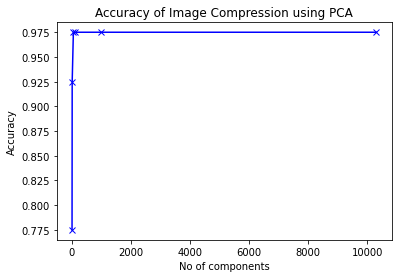

In [21]:
import matplotlib.pyplot as plt

plt.plot(no_of_components_list, accuracy_list_2, 'bx-')
plt.xlabel('No of components')
plt.ylabel('Accuracy')
plt.title('Accuracy of Image Compression using PCA')
plt.show()


***Plotting Mean Square Error and Log(MSE) for a test image***

In [22]:
# './ATnT/s15/10.pgm' at 2nd(1) position

MSE_list_2 = []
log_MSE_list_2 = []

for keys in components_res_dict:
  MSE_list_2.append(components_res_dict[keys][1][3])
  log_MSE_list_2.append(components_res_dict[keys][1][4])


In [23]:
print(no_of_components_list)
print(MSE_list_2)
print(log_MSE_list_2)

[5, 10, 50, 100, 1000, 10304]
[303.38876932857556, 1074.9322120840907, 2141.150264127352, 2450.062254288756, 2937.957881841401, 3441.751674831669]
[5.715015050173209, 6.980012880047063, 7.669098470212534, 7.803868713129724, 7.985470020974634, 8.14373582856505]


In [24]:
# Plot Number of eigenvectors vs Mean Square Error

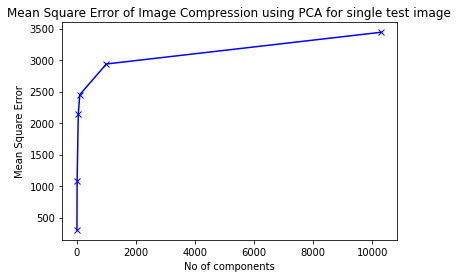

In [25]:
plt.plot(no_of_components_list, MSE_list_2, 'bx-')
plt.xlabel('No of components')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error of Image Compression using PCA for single test image')
plt.show()

In [26]:
# Plot Number of eigenvectors vs Logarithmic Mean Square Error

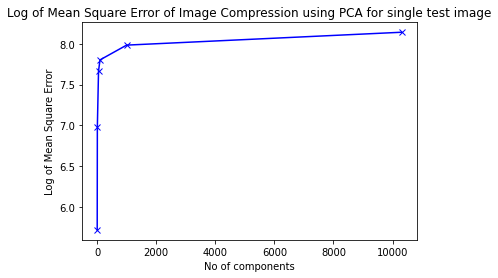

In [27]:
plt.plot(no_of_components_list, log_MSE_list_2, 'bx-')
plt.xlabel('No of components')
plt.ylabel('Log of Mean Square Error')
plt.title('Log of Mean Square Error of Image Compression using PCA for single test image')
plt.show()

Summarise your observations on the plots and accuracies

**Answer:** Accuracy rises to a point as the number of componenets increases, but then it plateaus since adding componenets only adds to the dataset's redundancy.

State the advantages and limitations of using PCA in general. Also state its limitations in context of face recognition

**Answer:** It lowers computing complexity by removing redundant or useless features from the dataset to find the best match, but occasionally important features may be overlooked due to low eigen values of the features on photos taken in a way that some facial features are completely white and receive bitmap value zero, which ultimately doesn't contribute to the eigen value but is of significant importance.